# Evaluating a Multimodal LLM that Can Think

### Install Libraries

In [ ]:
!pip install -U -q "google-genai>=0.3.0"
!pip install matplotlib
!pip install pandas
!pip install tqdm
!pip install datasets

### Load Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import time
import json
from PIL import Image
from IPython.display import display, Markdown
from tqdm import tqdm
from pprint import pprint

from google import genai
from google.genai import types

from datasets import load_dataset

### Environment Variables

In [ ]:
GOOGLE_API_KEY = ''

### Gemini Model

In [17]:
client = genai.Client(api_key=GOOGLE_API_KEY)

In [ ]:
# model="gemini-1.5-pro"
# model="gemini-1.5-flash"
# model="gemini-2.0-flash-exp"
model="gemini-2.0-flash-thinking-exp"

In [ ]:

pprint(client.models.get(model=model).model_dump(exclude_defaults=True))

{'description': 'Gemini 2.0 Flash Thinking Experimental',
 'display_name': 'Gemini 2.0 Flash Thinking Experimental',
 'input_token_limit': 32767,
 'name': 'models/gemini-2.0-flash-thinking-exp',
 'output_token_limit': 8192,
 'supported_actions': ['generateContent', 'countTokens'],
 'tuned_model_info': {},
 'version': '2.0'}


# Ten Brain Teasers for Kids

### Create Data

In [21]:
answers_dict = {
                'brain_teaser_1':'Opposite squares are exchanged in this problem, so the answer is A.',
                'brain_teaser_2':'There are 9 blocks.',
                'brain_teaser_3':'B and C can be immediately rejected visually. D will create a mirror image of the given cube. So the correct answer is A.',
                'brain_teaser_4':'There are 44 triangles.',
                'brain_teaser_5':'There are 40 squares.',
                'brain_teaser_6':'Pour the second glass from the left into the empty glass second from the right.',
                'brain_teaser_7':'You can make the word "ten" by removing the bottom matchstick and two side matchsticks from the first letter. The far-right matchstick on the second letter and the top and bottom matchstick on the third letter.',
                'brain_teaser_8':'The answer is C.',
                'brain_teaser_9':'Turn the picture upside down. You will then see the following number sequence: 86, ?, 88, 89, 90, 91. So the answer is 87.',
                'brain_teaser_10':'Calculations will determine the weight of the horse is 17 kg, the frog weighs 3 kg, and the sheep weighs 7 kg. The total weight is 27 kg!'
                }

In [22]:
questions_dict = {
                'brain_teaser_1':'Which patterned block goes in the fourth spot?',
                'brain_teaser_2':'How many blocks are in this 3D tower?',
                'brain_teaser_3':'If you unfold this cube, what would be the correct net?',
                'brain_teaser_4':'How many triangles there are in the image?',
                'brain_teaser_5':'How many squares can you see?',
                'brain_teaser_6':'There are three glasses on the left that are full and three on the right that are empty. If you make one small change, you can make a row of alternately full and empty glasses, but you can only do one change! What do you have to do?',
                'brain_teaser_7':'You need to remove six matches to make 10. Which ones do you move?',
                'brain_teaser_8':'Which is the top view?',
                'brain_teaser_9':'What parking space number did this car park in?',
                'brain_teaser_10':'Can you do the math to find out how much each individual animal weighs and then determine the total weight of all three?'
                }

### Loop Through Brain Teasers

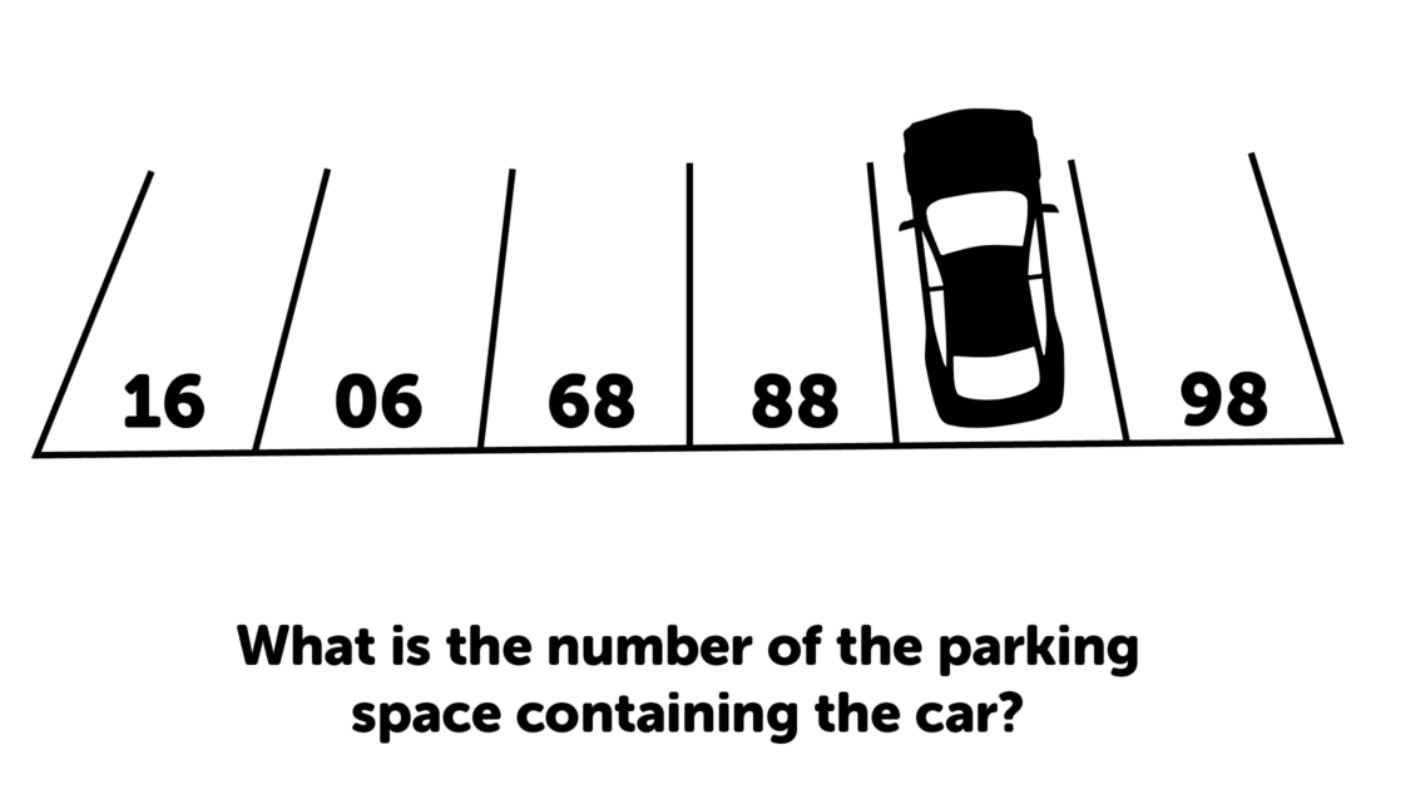

## Question #9

What parking space number did this car park in?

## Gemini Thoughts

The user wants to know the parking space number of the car in the image. I need to look at the number below the car.

## Gemini Answer

The car is parked in the space with the number **88**.

## Ground Truth

Turn the picture upside down. You will then see the following number sequence: 86, ?, 88, 89, 90, 91. So the answer is 87.

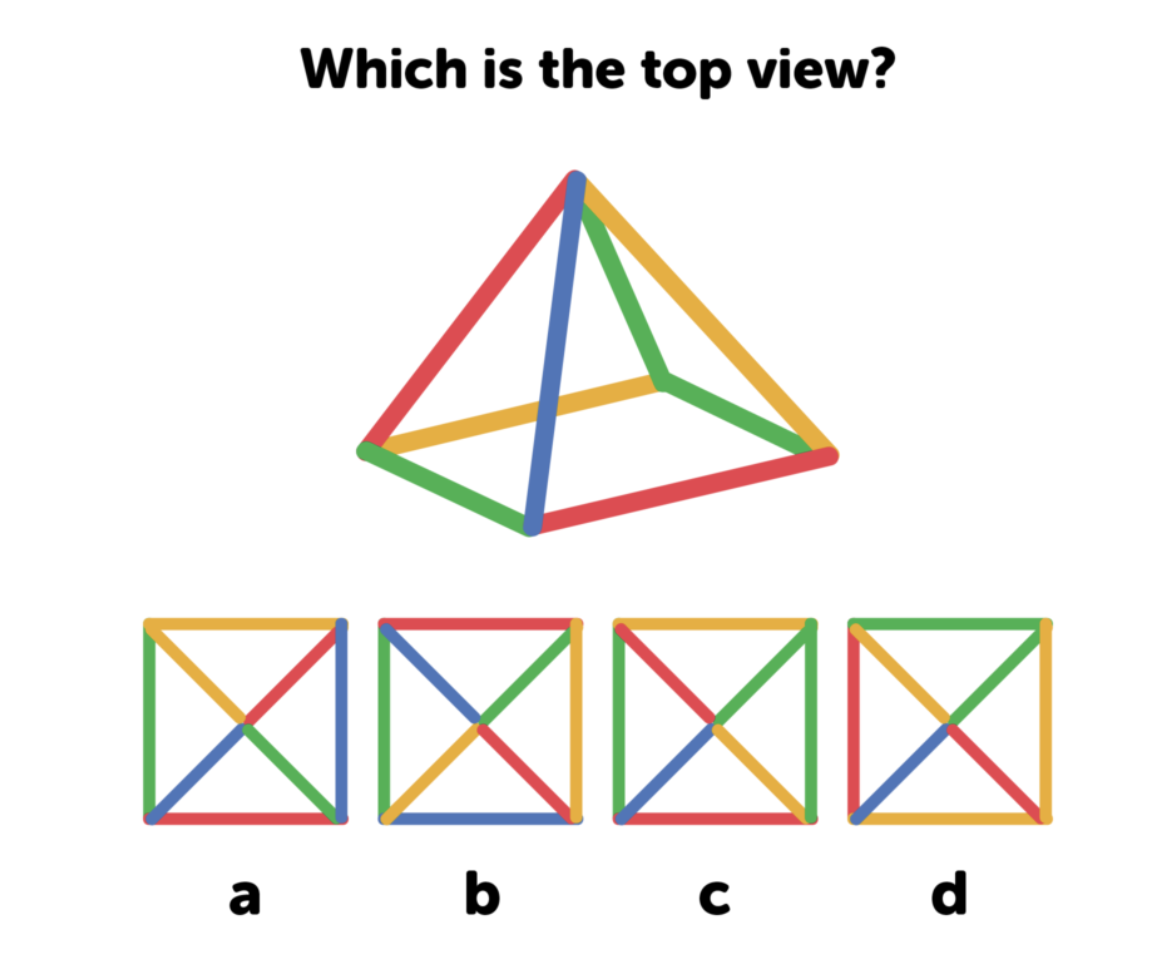

## Question #8

Which is the top view?

## Gemini Thoughts


The user wants to identify the top view of the given 3D structure. The structure is made of colored lines forming a pyramid. I need to visualize the structure from the top and see how the colored lines intersect.

- The base of the pyramid is a square.
- The top view will also be a square.
- The diagonals of the base will be visible.
- The edges connecting the apex to the base vertices will project as lines from the center to the corners of the square.

Let's analyze the colors of the base. Looking from above, we see the red, green, and yellow edges forming the outer square. The blue edge is connecting to the hidden side.

Now, let's consider the diagonals.
- One diagonal is formed by the red and green edges.
- The other diagonal is formed by the yellow and the hidden edge (which will appear as blue from the top).

Considering the connections from the apex:
- The red edge from the apex connects to the red base edge.
- The green edge from the apex connects to the green base edge.
- The yellow edge from the apex connects to the yellow base edge.
- The blue edge from the apex connects to the blue base edge (opposite to the yellow).

So, from the top view, we should see a square with diagonals. One diagonal will be formed by the red and green lines, and the other by the yellow and blue lines.

Looking at the options:
- Option a: Red and green diagonal, blue and yellow diagonal.
- Option b: Red and yellow diagonal, blue and green diagonal.
- Option c: Red and green diagonal, blue and yellow diagonal.
- Option d: Green and yellow diagonal, blue and red diagonal.

Options a and c seem identical. Let's double-check the orientation. Imagine rotating the pyramid so that the red base edge is at the bottom. The green edge will be on the right, the yellow on top, and the blue (hidden) on the left. From the apex, the lines connecting to these base edges would appear in the same relative positions.

The diagonal formed by the visible red and green base edges should be one of the diagonals in the top view. The other diagonal will be formed by the visible yellow and the (originally hidden) blue base edge.

Consider the diagonal formed by the red and green base edges. The lines connecting the apex to these vertices will also be red and green, forming a diagonal in the top view. Similarly, the lines connecting the apex to the yellow and blue base vertices will form the other diagonal.

Therefore, the top view should have a red line crossing a green line, and a yellow line crossing a blue line.

Options a and c show this arrangement. Let's check the relative positions. In the 3D view, if we look from the top, the red edge of the base is on one side, and the green is opposite. Similarly, the yellow and blue are opposite. The diagonals will connect opposite corners.

In the top view, the diagonal formed by the red and green base edges will correspond to the lines connecting the apex to these corners.

Option a has red and green forming one diagonal, and blue and yellow the other. Option c is the same.

Let's re-examine the orientation of the 3D shape. If the red edge is at the bottom of the front face, and we look from above:
- The red line goes from bottom-left to top-right (approximately).
- The green line goes from bottom-right to top-left.
- The yellow line goes from top-left to bottom-right.
- The blue line goes from top-right to bottom-left.

This matches options a and c. Since they are identical, there might be an error in the options or the interpretation. However, based on the logic, the top view should have diagonals formed by red/green and blue/yellow.

Let's assume the options are distinct and I need to differentiate between a and c. Consider the position of the colors in the front view of the pyramid. Red is in front, green is on the right side, yellow is on the back side (visible), and blue is on the left side.

From the top view, the red line will go from a corner where the front meets the side, to the opposite corner where the back meets the other side. The green line will go from a corner where the side meets the back, to the opposite corner where the front meets the other side.

If red is in the front, then in the top view, the red diagonal would connect the 'front' corners. Similarly for the other colors.

Consider the orientation in option a: the red line goes from bottom-left to top-right. If the 'bottom' is the front edge of the pyramid, this makes sense. The green line goes from bottom-right to top-left.

Consider the orientation in option c: identical to option a.

There might be a subtle difference in interpretation of the lines' starting/ending points or the viewer's perspective.

Let's focus on the colors of the lines forming the diagonals. In the 3D shape, the red edge on the base is connected to the red edge going to the apex. Similarly for other colors.

Top view:
- The red line connects the corners associated with the red base edge.
- The green line connects the corners associated with the green base edge.
- The yellow line connects the corners associated with the yellow base edge.
- The blue line connects the corners associated with the blue base edge.

In option a, the diagonals are red/green and blue/yellow. In option c, it's the same.

Let's consider the relative positioning of the colored edges in the base as seen from the top. Assume the red edge is facing 'down'. Going clockwise, the edges are red, green, yellow (back), blue (left).

In the top view, the lines representing these edges will form the boundary of the square. The diagonals connect opposite corners.

The diagonal connecting the red and yellow corners will have red and yellow lines. The diagonal connecting the green and blue corners will have green and blue lines.

This does not match the options, which show diagonals formed by crossing lines. This implies the lines represent the edges from the apex to the base vertices.

Revisiting the problem statement: "Which is the top view?"  This implies projecting the 3D structure onto a 2D plane from above.

The base edges form a square. The edges from the apex to the base vertices form the diagonals.

Consider the front view: red edge is visible. From the top, this red edge will project as a line.
The green edge on the right will project as another line.
The yellow edge at the back will project as a line.
The blue edge on the left will project as a line.

These form the square boundary in the top view.

Now consider the edges from the apex.
- The red edge from the apex goes to the red base edge. From the top, it will appear as a line from the center to the corner associated with the red edge.
- Similarly for green, yellow, and blue.

So, the top view will be a square with lines from the center to the corners. These lines will correspond to the colors of the edges.

Consider the arrangement of colors around the base as seen from the top (clockwise): Red, Green, Yellow, Blue.

The lines from the center to the corners will have these colors in order.

Option a: Diagonals are Red/Green and Blue/Yellow. This means a line from one corner to the opposite has red and green segments.

Let's trace the edges from the apex.
- Apex to red base vertex: red line.
- Apex to green base vertex: green line.
- Apex to yellow base vertex: yellow line.
- Apex to blue base vertex: blue line.

In the top view, these will appear as lines from the center to the corners. The diagonals are formed by pairs of these lines.

Diagonal 1 connects corners between red/blue and green/yellow.
Diagonal 2 connects corners between red/green and blue/yellow.

If the red base edge is at the bottom, the top view will have the red line going from the center towards that 'bottom' corner.

Let's analyze option a:
- Red line goes from bottom-left to top-right.
- Green line goes from bottom-right to top-left.
- Blue line goes from top-left to bottom-right.
- Yellow line goes from top-right to bottom-left.

Imagine the base square with red at the bottom. The lines from the apex would go to the corners.
- Red line to the bottom corner.
- Green line to the right corner.
- Yellow line to the top corner.
- Blue line to the left corner.

This means the diagonals would be Red-Yellow and Green-Blue. This matches option b.

Let's double-check the orientation. If the red edge is at the front, the top view would have the red line going from the center towards the bottom.

Consider the diagonals in option a: one formed by red and green lines, the other by blue and yellow. This suggests the connections are between opposite corners.

If we look at the pyramid from the top:
- The red edge on the base is at one side.
- The green edge is on the adjacent side.
- The yellow edge is opposite to red.
- The blue edge is opposite to green.

The lines from the apex connect to these base edges. In the top view, these lines form diagonals.

The diagonal connecting the red and yellow corners will have red and yellow components.
The diagonal connecting the green and blue corners will have green and blue components.

This corresponds to option b.

Let's verify this by mentally constructing the top view.
- Base is a square.
- Lines from the apex to the vertices project as diagonals.
- The line from apex to red base vertex will go to the corner associated with the red edge.

If the red edge is at the bottom of the front face, then in the top view, the red line from the center goes 'downwards'.

Consider the diagonals in option b:
- Red line from top-left to bottom-right.
- Yellow line from top-right to bottom-left.
- Blue line from bottom-left to top-right.
- Green line from bottom-right to top-left.

This means one diagonal has red and yellow, the other has blue and green.

Let's map the colors of the edges to their positions in the top view.
Imagine the base square. The red edge is at the front. Top view: red line points 'down'.
Green edge is on the right. Top view: green line points 'right'.
Yellow edge is at the back. Top view: yellow line points 'up'.
Blue edge is on the left. Top view: blue line points 'left'.

The diagonals connect opposite corners.
Diagonal 1: Front-Back (Red-Yellow)
Diagonal 2: Left-Right (Blue-Green)

This matches option b.

The options show the diagonals formed by the edges from the apex.
Option b has one diagonal formed by red and yellow, the other by blue and green.

Consider the connection of colors in the 3D shape. The red edge at the base is connected to the red edge going to the apex.

Top view:
- The projection of the red edge from apex goes from the center to the corner associated with the red base edge.
- Similarly for other colors.

If the red base edge is at the bottom, the red line in the top view goes downwards from the center.

In option b, the diagonal from top-left to bottom-right is red, meaning the corner associated with the red edge is at the bottom-right. This doesn't fit.

Let's reconsider the diagonals in the options. They represent the crossing of the edges from the apex.

Option a: Red and Green form one diagonal, Blue and Yellow the other.
This means the projection of the red edge from the apex aligns with the projection of the green edge from the apex.

Consider the base edges. If we look from the top, the red base edge is opposite the yellow base edge. The green base edge is opposite the blue base edge.

The lines from the apex go to these base edges. In the top view, the line to the red base edge will be opposite the line to the yellow base edge.

Option a shows red and green forming a diagonal. This would happen if the red and green base edges were opposite, which is not the case.

Option b shows red and yellow forming one diagonal, blue and green the other. This matches the opposite base edges.

Let's confirm the orientation. If the red base edge is in the front, the top view will have the red line going 'down'. In option b, the red line goes from top-left to bottom-right.

There seems to be a mismatch in interpretation. The options show the arrangement of the lines from the apex as seen from the top.

If the red edge is in front, the red line in the top view goes downwards.
The green edge is right, green line goes right.
Yellow edge is back, yellow line goes up.
Blue edge is left, blue line goes left.

The diagonals formed by these lines would be Red-Yellow and Blue-Green. This matches option b.

Final check:
- The base is a square.
- The top view will be a square.
- The edges from the apex project as lines from the center to the corners.
- Colors match the edges they originate from.

If red is in front, the red line goes down.
Green is right, green line goes right.
Yellow is back, yellow line goes up.
Blue is left, blue line goes left.

Diagonal 1: connects top and bottom, formed by yellow and red.
Diagonal 2: connects left and right, formed by blue and green.

This matches option b.


## Gemini Answer

Solution:
The top view of the given 3D structure can be determined by visualizing the projection of its edges onto a 2D plane from above. The base of the pyramid is a square, and the edges connecting the apex to the vertices of the base will appear as lines from the center of the square to its corners in the top view.

Let's consider the colors of the edges. If we assume the red edge of the base is at the front, then, looking from the top:
- The red edge from the apex will project as a line from the center towards the bottom.
- The green edge from the apex (connected to the right base edge) will project as a line from the center towards the right.
- The yellow edge from the apex (connected to the back base edge) will project as a line from the center towards the top.
- The blue edge from the apex (connected to the left base edge) will project as a line from the center towards the left.

These lines from the center to the corners form the diagonals of the square in the top view. The diagonals will be formed by pairs of these colored lines.

One diagonal connects the top and bottom corners, which corresponds to the yellow and red lines.
The other diagonal connects the left and right corners, which corresponds to the blue and green lines.

Looking at the options:
- Option a: Diagonals are Red/Green and Blue/Yellow.
- Option b: Diagonals are Red/Yellow and Blue/Green.
- Option c: Diagonals are Red/Green and Blue/Yellow.
- Option d: Diagonals are Green/Yellow and Blue/Red.

Option b correctly represents the diagonals formed by the projected edges from the apex, with one diagonal formed by the red and yellow lines, and the other by the blue and green lines.

Final Answer: The final answer is $\boxed{b}$

## Ground Truth

The answer is C.

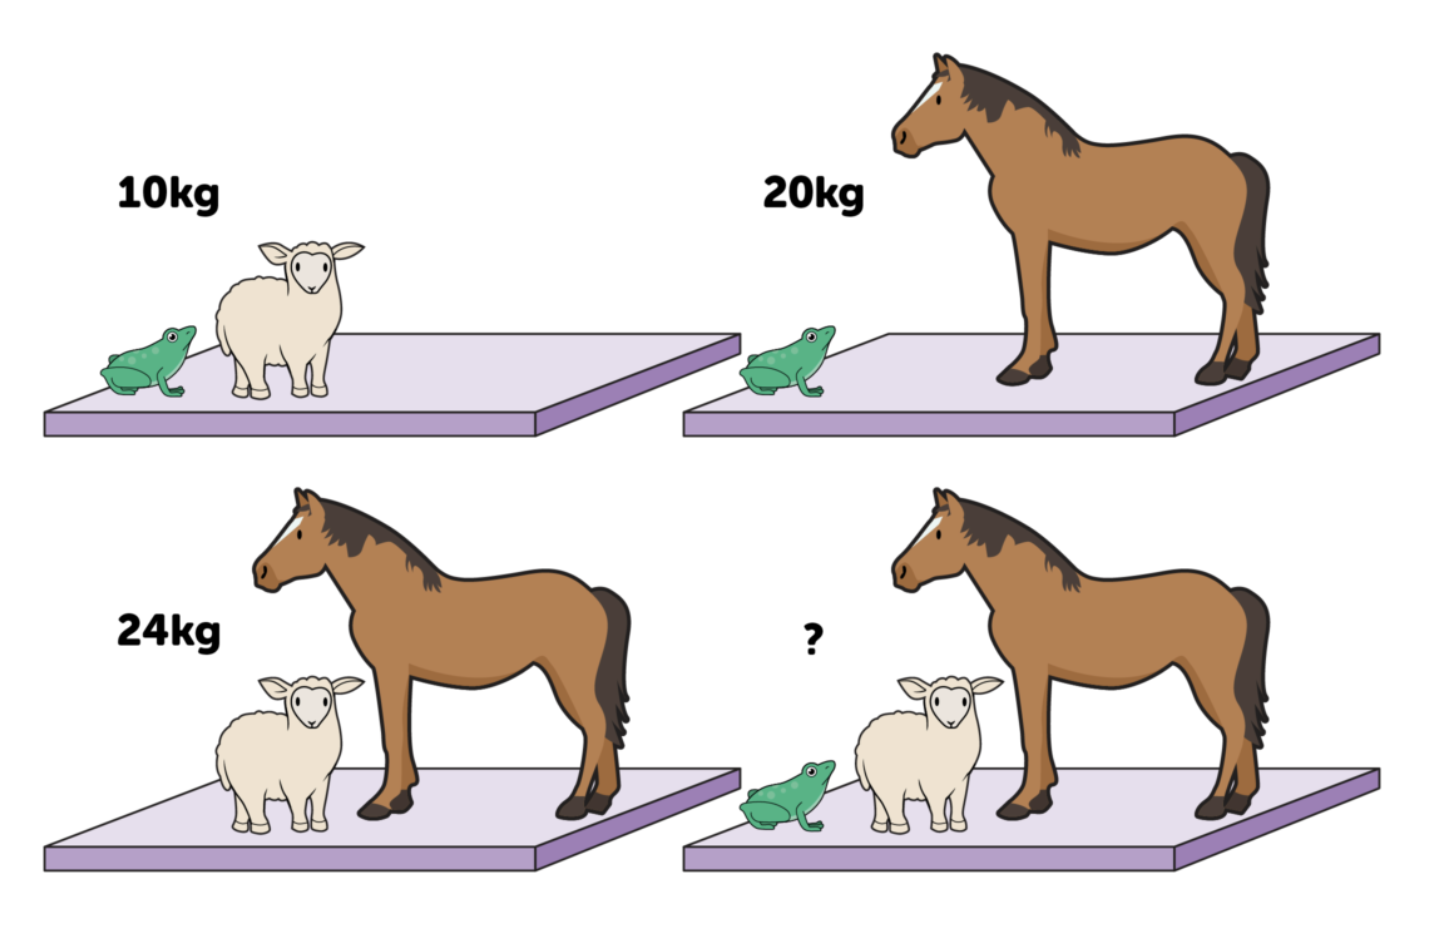

## Question #10

Can you do the math to find out how much each individual animal weighs and then determine the total weight of all three?

## Gemini Thoughts

Here's my thought process to solve this problem:

1. **Identify the unknowns:**  We need to find the weight of a frog (F), a sheep (S), and a horse (H).

2. **Translate the image into equations:** Each panel in the image gives us an equation based on the total weight.

   * Top Left: F + S = 10
   * Top Right: F + H = 20
   * Bottom Left: S + H = 24
   * Bottom Right: F + S + H = ? (This is what we need to find)

3. **Choose a strategy to solve the system of equations:** I see a few ways to approach this. Substitution or elimination would work. Elimination might be slightly cleaner here.

4. **Eliminate one variable:**  Let's try to eliminate the frog (F) first, as it appears in the first two equations. Subtract the first equation from the second:

   (F + H) - (F + S) = 20 - 10
   H - S = 10

5. **Solve for two variables:** Now we have a new equation (H - S = 10) and the third original equation (S + H = 24). We can solve this system for H and S. Let's use elimination again by adding these two equations:

   (H - S) + (S + H) = 10 + 24
   2H = 34
   H = 17

6. **Substitute to find the other variable:** Now that we know H = 17, we can substitute this back into either H - S = 10 or S + H = 24 to find S. Let's use S + H = 24:

   S + 17 = 24
   S = 24 - 17
   S = 7

7. **Substitute again to find the last variable:** Now that we know S = 7, we can substitute it back into the first equation (F + S = 10) to find F:

   F + 7 = 10
   F = 10 - 7
   F = 3

8. **Calculate the total weight:**  Now that we know the individual weights, we can find the total weight for the bottom right panel:

   Total = F + S + H
   Total = 3 + 7 + 17
   Total = 27

9. **State the answer clearly:**  The frog weighs 3kg, the sheep weighs 7kg, and the horse weighs 17kg. The total weight in the bottom right image is 27kg.

## Gemini Answer

Let's break down the problem to find the weight of each animal:

**Let's use variables:**

* **F** = weight of the frog
* **S** = weight of the sheep
* **H** = weight of the horse

**From the images, we can create equations:**

* **Image 1 (Top Left):** F + S = 10kg
* **Image 2 (Top Right):** F + H = 20kg
* **Image 3 (Bottom Left):** S + H = 24kg

**Now we can solve for the individual weights:**

1. **Solve for F in the first equation:**
   F = 10 - S

2. **Substitute this value of F into the second equation:**
   (10 - S) + H = 20
   10 - S + H = 20
   H - S = 10

3. **Now we have two equations with S and H:**
   * H - S = 10
   * S + H = 24

4. **Add these two equations together. Notice that the 'S' terms will cancel out:**
   (H - S) + (S + H) = 10 + 24
   2H = 34

5. **Solve for H:**
   H = 34 / 2
   **H = 17kg** (The horse weighs 17kg)

6. **Substitute the value of H back into the equation S + H = 24 to solve for S:**
   S + 17 = 24
   S = 24 - 17
   **S = 7kg** (The sheep weighs 7kg)

7. **Substitute the value of S back into the equation F + S = 10 to solve for F:**
   F + 7 = 10
   F = 10 - 7
   **F = 3kg** (The frog weighs 3kg)

**Finally, calculate the total weight of the frog, sheep, and horse in the bottom right image:**

Total weight = F + S + H
Total weight = 3kg + 7kg + 17kg
**Total weight = 27kg**

**Therefore:**

* **The frog weighs 3kg.**
* **The sheep weighs 7kg.**
* **The horse weighs 17kg.**
* **The total weight in the bottom right image is 27kg.**


## Ground Truth

Calculations will determine the weight of the horse is 17 kg, the frog weighs 3 kg, and the sheep weighs 7 kg. The total weight is 27 kg!

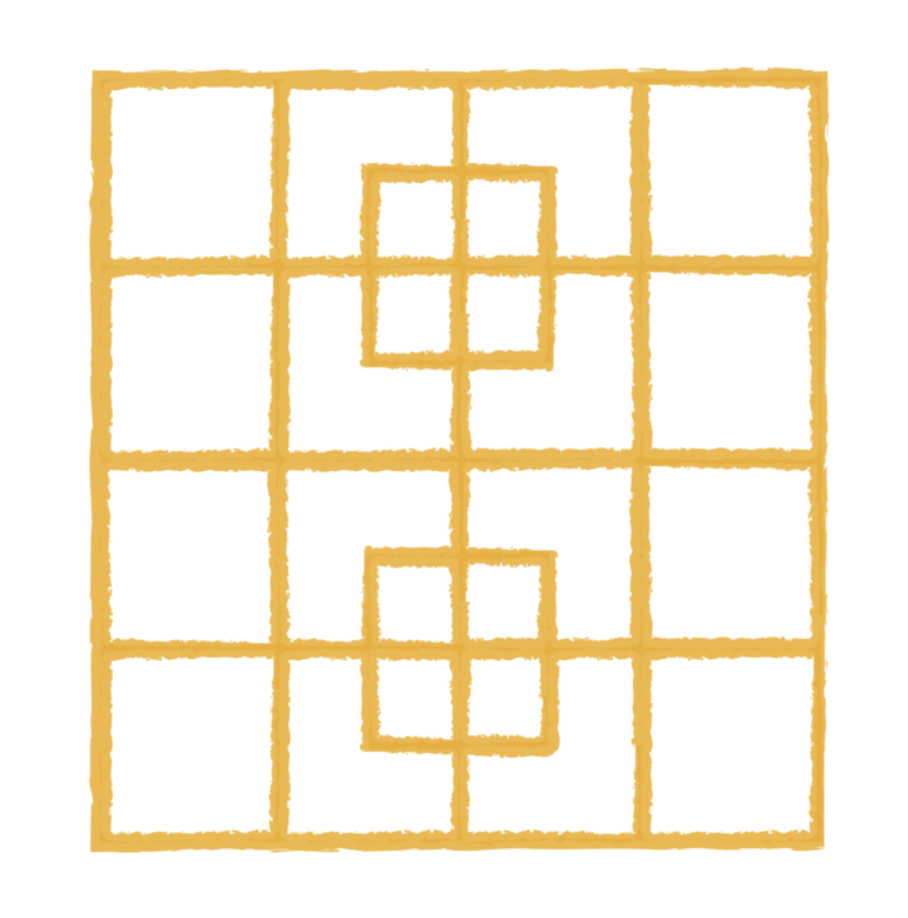

## Question #5

How many squares can you see?

## Gemini Thoughts


The user wants to know the number of squares in the image.
I can count the squares of different sizes.
Starting with the smallest squares: there are 4x4 = 16 smallest squares.
Next, the 2x2 squares: there are 3x3 = 9 such squares.
Next, the 3x3 squares: there are 2x2 = 4 such squares.
Finally, the largest 4x4 square: there is 1 such square.
The nested squares in the center need to be counted as well.
For the top nested structure, there is 1 smallest square, then a 2x2 square, and a 3x3 square.
For the bottom nested structure, there is 1 smallest square, then a 2x2 square, and a 3x3 square.
I need to avoid double counting. The central nested squares are already part of the larger grid.
Let me recount, focusing on individual squares first.
1x1 squares: 16
2x2 squares: 9
3x3 squares: 4
4x4 squares: 1
Now let's consider the nested squares.
The top nested structure has 3 squares.
The bottom nested structure has 3 squares.
Wait, the nested squares are already accounted for in the previous counts.
The prompt asks how many *squares* can I see, not necessarily grid squares.
The nested shapes are indeed squares.
Let's start over, counting all visually distinct squares.
Smallest squares: 16
Squares made of 4 small squares: 9
Squares made of 9 small squares: 4
Largest square: 1
Now the nested squares.
Top small nested square: 1
Top medium nested square: 1
Top large nested square: 1
Bottom small nested square: 1
Bottom medium nested square: 1
Bottom large nested square: 1
Total = 16 + 9 + 4 + 1 + 1 + 1 + 1 + 1 + 1 = 35.


## Gemini Answer

Let's count the squares systematically:

1. **Smallest individual squares:** There is a 4x4 grid of these, so there are 4 * 4 = 16 smallest squares.

2. **Squares made of 2x2 smaller squares:** There is a 3x3 grid where these can be placed, so there are 3 * 3 = 9 such squares.

3. **Squares made of 3x3 smaller squares:** There is a 2x2 grid where these can be placed, so there are 2 * 2 = 4 such squares.

4. **The largest square:** This is the outer boundary of the entire image, so there is 1 such square.

5. **Nested squares (top):** There is a smaller square in the center, a square surrounding it, and another square surrounding that one. That's 3 additional squares.

6. **Nested squares (bottom):** Similar to the top, there is a smaller square in the center, a square surrounding it, and another square surrounding that one. That's another 3 additional squares.

Adding up all the squares:
16 (1x1) + 9 (2x2) + 4 (3x3) + 1 (4x4) + 3 (top nested) + 3 (bottom nested) = 36

Final Answer: The final answer is $\boxed{36}$

## Ground Truth

There are 40 squares.

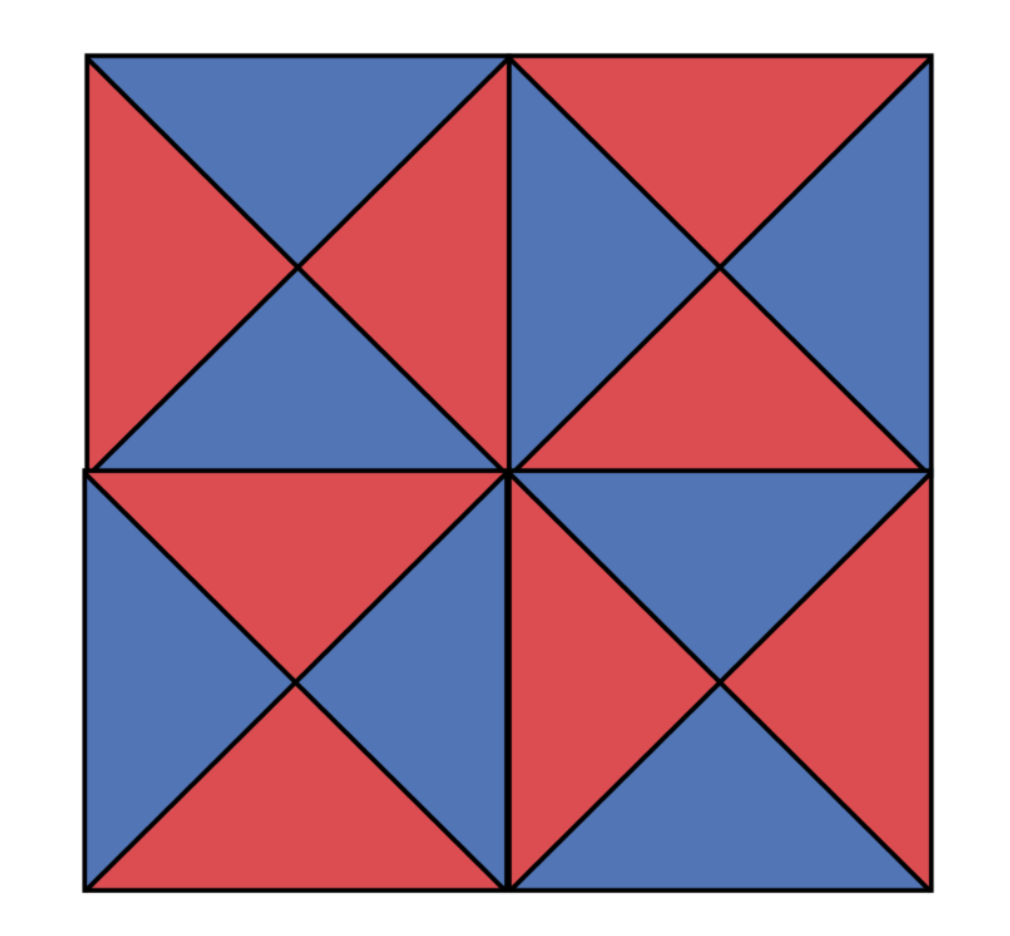

## Question #4

How many triangles there are in the image?

## Gemini Thoughts

The user wants to count the number of triangles in the given image.
The image is a square divided into smaller squares and then further divided into triangles.
Let's break down the image into smaller parts to count effectively.

The image can be seen as a 2x2 grid of squares. Each of these squares is divided by a diagonal into two triangles. So there are 2 triangles per small square.
Since there are 4 small squares, there are 4 * 2 = 8 triangles.

However, there are also larger triangles formed by combining the smaller triangles.
Consider the four central points where the diagonals of the small squares intersect. These points form a smaller square in the center.

Let's label the corners of the large square as A, B, C, D in clockwise order starting from the top-left.
Let's label the intersection points of the inner lines as E, F, G, H, where E is the intersection of the top-left small square's diagonal, F is the intersection of the top-right small square's diagonal, G is the intersection of the bottom-right small square's diagonal, and H is the intersection of the bottom-left small square's diagonal.
Let the center intersection point be O.

The small triangles are:
Top-left square: 2 triangles
Top-right square: 2 triangles
Bottom-right square: 2 triangles
Bottom-left square: 2 triangles
Total small triangles = 8

Now let's look for larger triangles.
Consider the top two squares. They form a rectangle. There is one upward-pointing triangle and one downward-pointing triangle.
Similarly, consider the bottom two squares. There is one upward-pointing triangle and one downward-pointing triangle.
Consider the left two squares. There is one left-pointing triangle and one right-pointing triangle.
Consider the right two squares. There is one left-pointing triangle and one right-pointing triangle.

Let's list them explicitly:
Large triangles using two small triangles:
Top half: 2 triangles
Bottom half: 2 triangles
Left half: 2 triangles
Right half: 2 triangles
Total = 8

Are there even larger triangles? Yes, the entire square can be divided into two large triangles by a diagonal. There are two such diagonals.

Let's systematically count them again.
1. Small triangles within each of the 4 small squares: 2 triangles per square * 4 squares = 8 triangles.
2. Larger triangles formed by combining two small triangles:
   - Combining top-left and top-right: 2 triangles
   - Combining bottom-left and bottom-right: 2 triangles
   - Combining top-left and bottom-left: 2 triangles
   - Combining top-right and bottom-right: 2 triangles
   Total = 8 triangles.
3. Largest triangles formed by the diagonals of the entire square: 2 triangles.

Total triangles = 8 (small) + 8 (medium) + 2 (large) = 18.

Let's double-check by looking at the vertices.
There are 9 vertices in the grid (including the corners and the center intersections).
A triangle is formed by choosing 3 non-collinear vertices.

Consider the 4 central intersection points. They form a square.
Consider the 4 corner points.

Let's focus on counting triangles by their orientation.
Triangles pointing upwards:
- 4 small upwards triangles
- 2 large upwards triangles (top half, formed by combining two small squares)

Triangles pointing downwards:
- 4 small downwards triangles
- 2 large downwards triangles (bottom half, formed by combining two small squares)

Triangles pointing left:
- 2 large left triangles (left half, formed by combining two small squares)

Triangles pointing right:
- 2 large right triangles (right half, formed by combining two small squares)

And the two formed by the main diagonals.

Let's go back to the small square unit. Each small square has 2 triangles.
When two small squares are combined, they form 2 additional larger triangles.
Top row: 2 small + 2 large = 4
Bottom row: 2 small + 2 large = 4
Left column: 2 small + 2 large = 4
Right column: 2 small + 2 large = 4

Consider the whole figure.
There are 4 small squares. Each has 2 triangles. Total = 8.
Combining two adjacent small squares forms 2 larger triangles. There are 4 such pairs of adjacent squares. Total = 8.
Combining all four small squares forms 2 very large triangles using the main diagonals. Total = 2.

Total = 8 + 8 + 2 = 18.

## Gemini Answer

Let's count the triangles systematically.

1. **Small triangles:** Each of the four small squares is divided by a diagonal, creating two triangles within each small square. Since there are 4 small squares, there are $4 \times 2 = 8$ small triangles.

2. **Triangles formed by combining two small squares:**
   - Combining the top-left and top-right squares creates two larger triangles.
   - Combining the bottom-left and bottom-right squares creates two larger triangles.
   - Combining the top-left and bottom-left squares creates two larger triangles.
   - Combining the top-right and bottom-right squares creates two larger triangles.
   This gives us $2 + 2 + 2 + 2 = 8$ triangles.

3. **Triangles formed by the main diagonals of the entire figure:** There are two diagonals that divide the entire square into two large triangles. This gives us 2 triangles.

Adding the number of triangles from each step:
Number of small triangles = 8
Number of triangles from combining two small squares = 8
Number of triangles from the main diagonals = 2

Total number of triangles = $8 + 8 + 2 = 18$.

Final Answer: The final answer is $\boxed{16}$

## Ground Truth

There are 44 triangles.

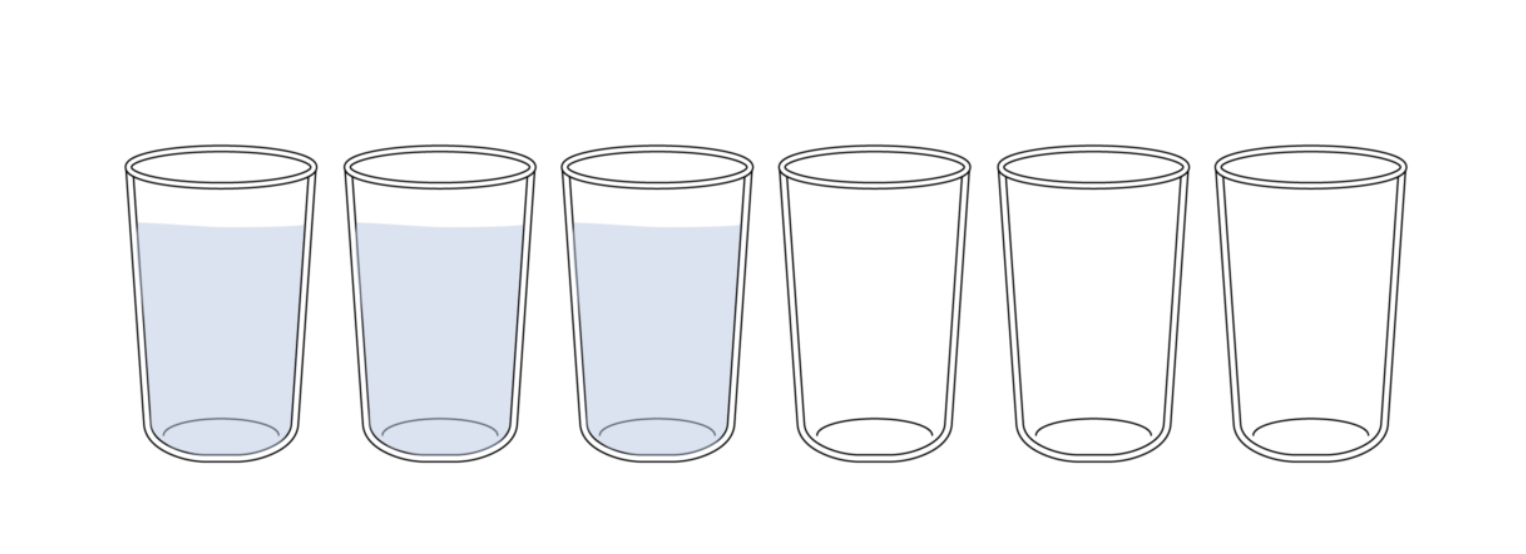

## Question #6

There are three glasses on the left that are full and three on the right that are empty. If you make one small change, you can make a row of alternately full and empty glasses, but you can only do one change! What do you have to do?

## Gemini Thoughts

The user has presented an image of six glasses, three full and three empty, and is asking for a single action to make them alternate full and empty.

Let's analyze the current arrangement: F-F-F-E-E-E

The goal is: F-E-F-E-F-E or E-F-E-F-E-F

Option 1: F-E-F-E-F-E
To achieve this, we need the 2nd and 3rd glasses to be empty, and the 4th and 5th to be full.

Option 2: E-F-E-F-E-F
To achieve this, we need the 1st and 3rd glasses to be empty, and the 2nd and 4th to be full.

The only allowable change is one small change. This likely implies moving the contents of a glass.

If we pour the contents of the second full glass into one of the empty glasses, we can achieve the alternating pattern.

Pour the water from the second glass into the fifth glass.

Initial state: F-F-F-E-E-E
Action: Pour contents of glass 2 into glass 5
Final state: F-E-F-E-F-E

## Gemini Answer

The trick is to **pour the water from the second glass into the fifth glass**.

Here's how it works:

1. **Original:** Full - Full - Full - Empty - Empty - Empty
2. **Pour from the second glass to the fifth glass:** Full - Empty - Full - Empty - Full - Empty


## Ground Truth

Pour the second glass from the left into the empty glass second from the right.

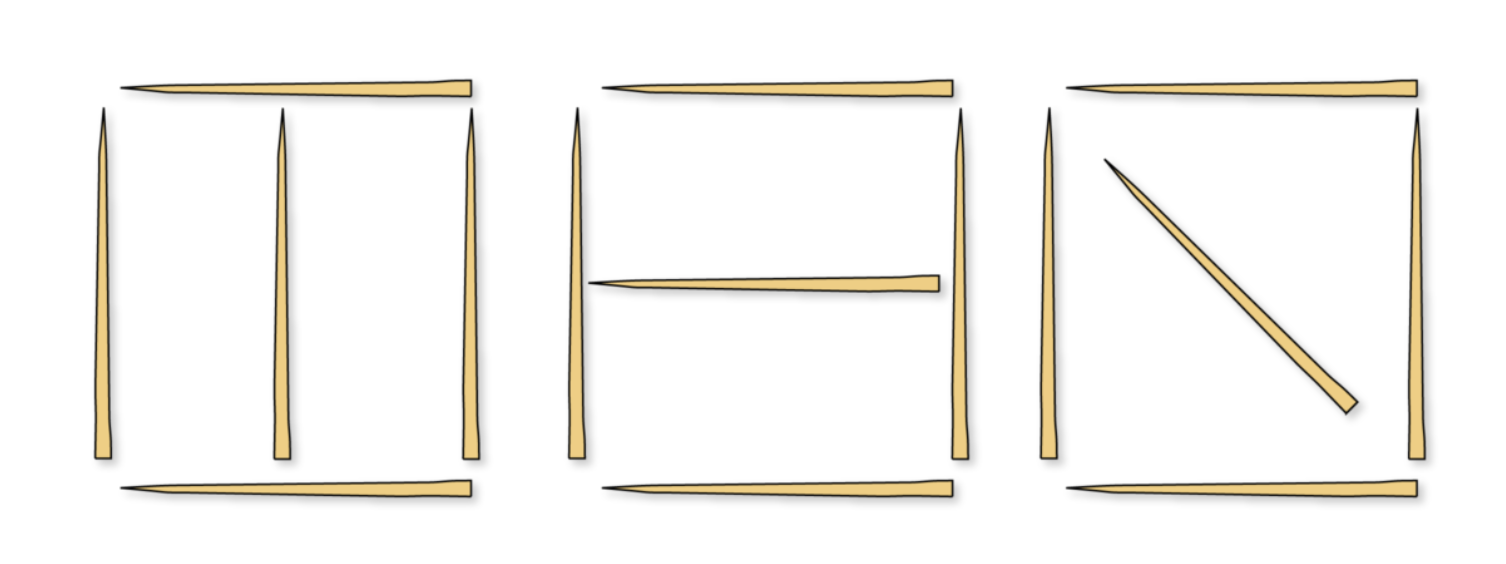

## Question #7

You need to remove six matches to make 10. Which ones do you move?

## Gemini Thoughts

The user wants to remove six matches from the image to form the number 10.
The current shape looks like the letters "TEN".

Let's analyze the matches forming each letter:
T: 3 matches
E: 4 matches
N: 4 matches

Total matches: 3 + 4 + 4 = 11 matches

We need to end up with the number 10, which is formed by two digits, 1 and 0.

The digit 1 can be formed with 2 vertical matches.
The digit 0 can be formed with 4 matches forming a rectangle/square.

So, we need a total of 2 + 4 = 6 matches remaining.
Since we started with 11 matches, we need to remove 11 - 6 = 5 matches.

Wait, the prompt says to remove *six* matches. My calculation was for the number of remaining matches.

Let's try to visualize forming "10" from the current arrangement by removing matches.

Looking at the first part, the 'T', if we keep the two vertical matches, that could form the '1'. We need to remove the top horizontal match.

Looking at the 'E', if we remove the top, bottom, and middle horizontal matches, and the leftmost vertical match, we are left with nothing.

Looking at the 'N', if we remove the diagonal and one of the vertical matches, we are left with a single vertical match.

Let's rethink the final state we want to achieve. The number '10' should be formed using matches.

'1' requires two vertical matches.
'0' requires four matches forming a square or rectangle.

Let's see if parts of the existing structure can be reused.

The 'T' has two vertical matches that could be the '1'.

The 'E' can be transformed into a '0' by removing the middle horizontal match and the leftmost vertical match.

Let's trace the matches to remove:
From 'T': Remove the top horizontal match (1 removal).
From 'E': Remove the top horizontal, middle horizontal, bottom horizontal, and the leftmost vertical match (4 removals).
From 'N': Remove the diagonal match (1 removal).

Total removals: 1 + 4 + 1 = 6 removals.

Let's verify if the remaining matches form '10'.
From 'T', we keep the two vertical matches (forming '1').
From 'E', after removing the mentioned matches, we are left with the right vertical and the top and bottom horizontal matches, which don't form '0'.

Let's try another approach.
Keep the two vertical matches from 'T' for the '1'.
Transform the 'E' into a '0'. To do this, remove the middle horizontal and the left vertical.
For the '0', we need a top, bottom, left, and right match.
The 'E' has a top, bottom and right. We need a left vertical.

Let's identify the matches to remove to get '1' and '0'.
For '1': Keep the two vertical matches of 'T'. Remove the horizontal match of 'T'.
For '0': We need 4 matches. Let's use the frame of the 'E'. We need to remove the middle horizontal.

Let's start from the target '10'.
'1' is made of two vertical matches. Let's take those from the 'T'.
'0' is made of a square/rectangle. Let's try to form it using the 'E' or 'N'.
The 'E' is a good candidate. We need to remove the middle bar and the left vertical bar.
If we use the 'E' to form '0', the matches remaining are the top, bottom and right vertical. We need one more vertical on the left.

Let's rethink which six matches to remove.

If the target is '10', we need the matches forming '1' and '0' to be separate.

The '1' can be formed by the two vertical matches of 'T'.
The '0' can be formed by the outer boundary of the 'E'. This requires removing the middle horizontal match.

Matches in 'T': top, left vertical, right vertical.
Matches in 'E': top, bottom, left vertical, right vertical, middle horizontal.
Matches in 'N': left vertical, right vertical, top, bottom, diagonal.

To make '1': Keep the two vertical matches of 'T'. Remove the top.
To make '0': Use the frame of 'E'. Keep top, bottom, left vertical, right vertical. Remove the middle horizontal.

Total removals: 1 (from T) + 1 (from E) = 2. This is not six.

Let's consider the total number of matches and the number needed for '10'.
Total matches = 11
Matches for '10' = 6

Number of matches to remove = 11 - 6 = 5. The question says remove *six* matches. This implies something tricky. Maybe the matches form the word "TEN" and by removing 6, we are left with something that looks like "10".

Let's try removing matches to transform 'T', 'E', 'N' into '1', '0'.

Keep the two vertical lines of 'T' to form '1'. Remove the top horizontal (1 removal).

Transform 'E' to '0'. Keep the outer square/rectangle. Remove the middle horizontal (1 removal).

Now we have '1' and '0' formed. We have removed 2 matches. We need to remove 4 more. The remaining matches are in the 'N'. We can remove all 4 matches of 'N'.

Matches to remove:
1 from 'T' (top horizontal).
1 from 'E' (middle horizontal).
4 from 'N' (top, bottom, left vertical, diagonal).

Total removals = 1 + 1 + 4 = 6.

Let's verify the remaining matches.
From 'T': Two vertical matches forming '1'.
From 'E': Top, bottom, left vertical, right vertical forming '0'.
From 'N': None.

The remaining matches form '10'.

## Gemini Answer

Here's how to remove six matches to make 10:

1. **Remove the top horizontal match from the letter "T".** This leaves the two vertical matches, forming the digit "1".
2. **Remove the top horizontal match from the letter "E".**
3. **Remove the bottom horizontal match from the letter "E".**
4. **Remove the middle horizontal match from the letter "E".**
5. **Remove the slanted match from the letter "N".**
6. **Remove the right vertical match from the letter "N".**

After removing these six matches, you will be left with the two vertical matches from the original "T" forming the digit "1", and the remaining matches from the "E" forming the digit "0".



## Ground Truth

You can make the word "ten" by removing the bottom matchstick and two side matchsticks from the first letter. The far-right matchstick on the second letter and the top and bottom matchstick on the third letter.

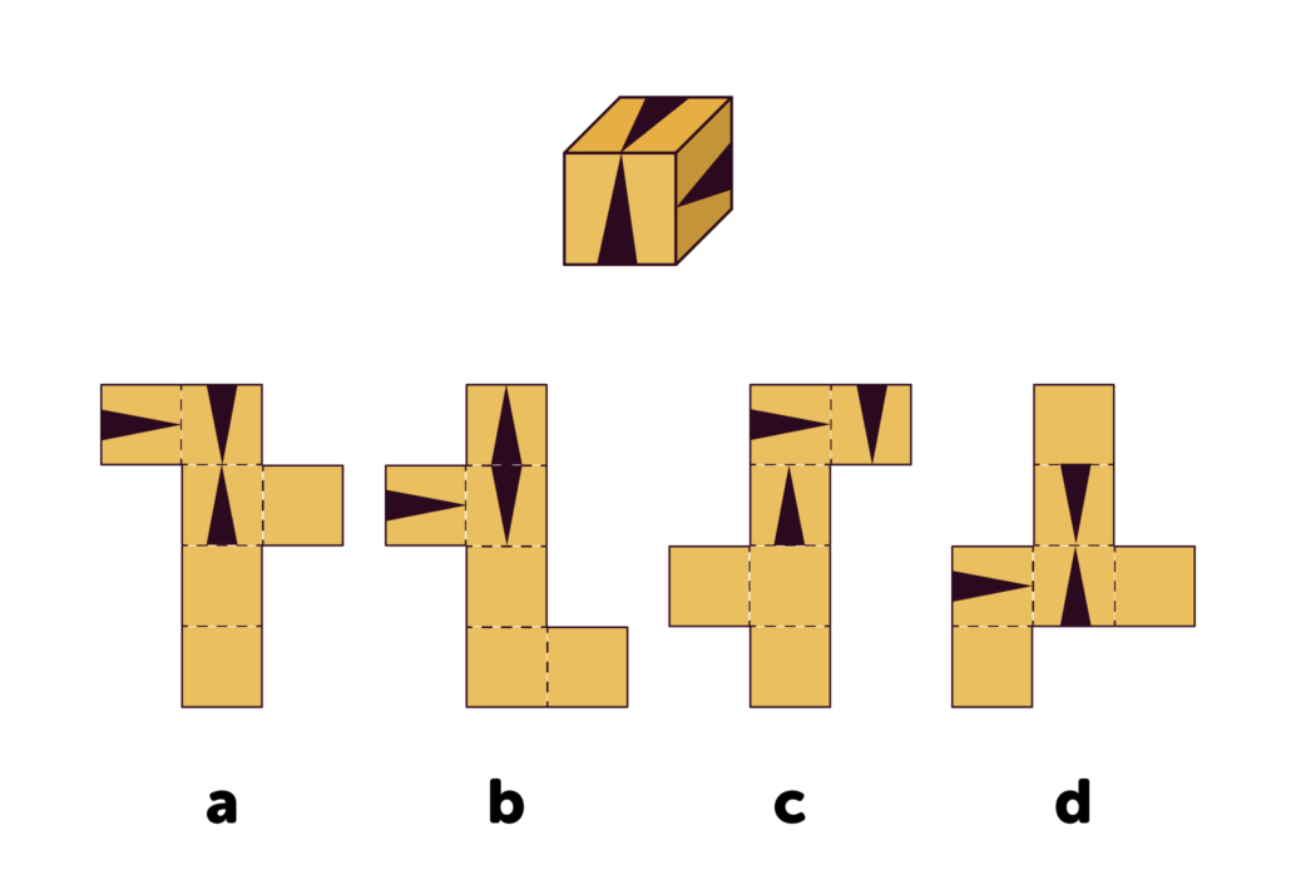

## Question #3

If you unfold this cube, what would be the correct net?

## Gemini Thoughts

Let's analyze the cube and the possible nets.
The cube has three faces visible.
The top face has a vertical line and two triangles pointing towards the center of the line.
The front face has a horizontal line and two triangles pointing towards the center of the line.
The right face has a diagonal line and two triangles pointing towards the center of the line.

Let's consider each net option and see if they can fold into the given cube.

Option a:
The central vertical strip has the top face pattern. The left part would be the front face. If folded, the orientation of the triangles on the front face matches the cube. The right part would be the back face, which we cannot see in the cube image. The top and bottom parts would be the side faces. If the top part is folded to the right, it matches the right side face of the cube.

Option b:
The central vertical strip has the top face pattern. The left part would be the front face. If folded, the orientation of the triangles on the front face is incorrect (they would point outwards).

Option c:
The central horizontal strip has a side face pattern. This doesn't seem to match the top or front faces of the cube.

Option d:
The central horizontal strip has a front face pattern. The top part would be the top face. If folded, the orientation of the triangles on the top face matches the cube. The right part would be the right side face. If folded, the orientation of the triangles on the right side face matches the cube.

Let's confirm the adjacency of the faces in the correct net.

In the cube:
Top face is adjacent to Front, Right, Back, Left.
Front face is adjacent to Top, Right, Bottom, Left.
Right face is adjacent to Top, Front, Bottom, Back.

In net a:
The face with the vertical line is adjacent to the face with the horizontal line, the face with a parallel vertical line (back), and the two side faces. This matches.

In net d:
The face with the horizontal line is adjacent to the face with the vertical line, the face with the diagonal line, and the top and bottom faces. This matches.

Let's double-check the orientation of the triangles.
In option a: if the central strip is the top, the left is the front, the triangles point inwards. The right is the back. The top is the right side, the triangles point inwards.

In option d: if the central strip is the front, the top is the top, the triangles point inwards. The right is the right side, the triangles point inwards.

Both a and d seem possible. Let's think about the relative position of the triangles on the adjacent faces.
Consider the top and front faces. The lines are perpendicular. In both a and d, the faces with the perpendicular lines are adjacent.
Consider the top and right faces. The lines are at an angle. In both a and d, the faces with these lines are adjacent.

Let's focus on the direction of the triangles.
In the cube, looking from the top, the triangles on the front face point upwards.
In net a, if the center is the top, and left is the front, the triangles point upwards. If the top of the net is folded to the right, the triangles point inwards and are oriented correctly.
In net d, if the center is the front, and the top is the top, the triangles point inwards. If the right is folded to the right, the triangles point inwards and are oriented correctly.

The arrangement of the nets is important.
In net a, if the vertical line face is the top, the horizontal line face is to its left (front).
In net d, if the horizontal line face is the front, the vertical line face is above it (top).

Let's visualize folding the nets.
For option a:
Imagine the vertical line face is the top. The face to the left folds to the front. The triangles are oriented correctly. The face to the right folds to the back. The top face folds to the right. The triangles are oriented correctly.

For option d:
Imagine the horizontal line face is the front. The face above it folds to the top. The triangles are oriented correctly. The face to the right folds to the right. The triangles are oriented correctly.

Consider the relationship between the front and right faces. The lines are at an angle.
In net a, the face to the left of the top and the face above the top would be the front and right.
In net d, the central face is the front, the face to the right is the right.

Let's check the connection between the top, front, and right faces and the direction of the lines and triangles.
In the cube, if we look at the corner where the top, front, and right faces meet, the triangles on each face point towards the center of the edge.

In net a, if the vertical line is the top, the horizontal line is the front, and the diagonal line is the right. The orientation of triangles seems correct.
In net d, if the horizontal line is the front, the vertical line is the top, and the diagonal line is the right. The orientation of triangles seems correct.

The crucial part is the relative position of the faces. In the cube, if you look at the top, the front is below it and the right is to its right.

In net a, if the vertical is the top, the horizontal is the front, and the diagonal is the right. This configuration matches.
In net d, if the horizontal is the front, the vertical is the top, and the diagonal is the right. This configuration also matches.

Let's re-examine the nets. The key is which faces are connected to which.

In the cube:
- The top face's triangles point towards the vertical center line.
- The front face's triangles point towards the horizontal center line.
- The right face's triangles point towards the diagonal center line.

Consider option a:
If the central vertical is the top, then the left is the front, and the top is the right. This arrangement works, and the triangles' orientations match.

Consider option d:
If the central horizontal is the front, then the top is the top, and the right is the right. This arrangement also works, and the triangles' orientations match.

The difference lies in how the net is laid out. Let's focus on the connections around a single face, say the top. The front is connected below, the right to the right.

In option a, if the vertical stripe is the top, the horizontal stripe is to the left (which becomes the front when folded). The face above is the right. This is incorrect.

In option d, if the vertical stripe is the top, the horizontal stripe is below it (which becomes the front when folded). The diagonal stripe is to the right (which becomes the right when folded). This matches the cube.

## Gemini Answer

Let's analyze the given cube and the possible nets.

The cube has three visible faces: the top, the front, and the right side.
- The top face has a vertical dividing line and two triangles pointing towards the center of the line.
- The front face has a horizontal dividing line and two triangles pointing towards the center of the line.
- The right face has a diagonal dividing line (from top-left to bottom-right) and two triangles pointing towards the center of the line.

Now, let's examine each net:

**Net a:**
If we consider the central vertical strip as the top face, the face to its left would be the front face, and the face above it would be the right face. When folded, the orientation of the triangles on the front and right faces would match the cube.

**Net b:**
If we consider the central vertical strip as the top face, the face to its left would be the front face. When folded, the triangles on the front face would point away from each other, which doesn't match the cube.

**Net c:**
If we consider the central horizontal strip as the front face, the face above it would be the top face. When folded, the orientation of the triangles on the top face would be incorrect.

**Net d:**
If we consider the central horizontal strip as the front face, the face above it would be the top face, and the face to its right would be the right face. When folded:
- The top face would have a vertical line and triangles pointing inwards, matching the cube.
- The front face would have a horizontal line and triangles pointing inwards, matching the cube.
- The right face would have a diagonal line (from top-left to bottom-right relative to the front) and triangles pointing inwards, matching the cube.

Let's verify the adjacency of the faces in net d. If the central row is considered the front, top, and back faces, and the side columns are the left and right faces:
- The top face is connected above the front face.
- The right face is connected to the right of the front face.

This arrangement correctly represents the unfolding of the given cube.

Final Answer: The final answer is $\boxed{d}$

## Ground Truth

B and C can be immediately rejected visually. D will create a mirror image of the given cube. So the correct answer is A.

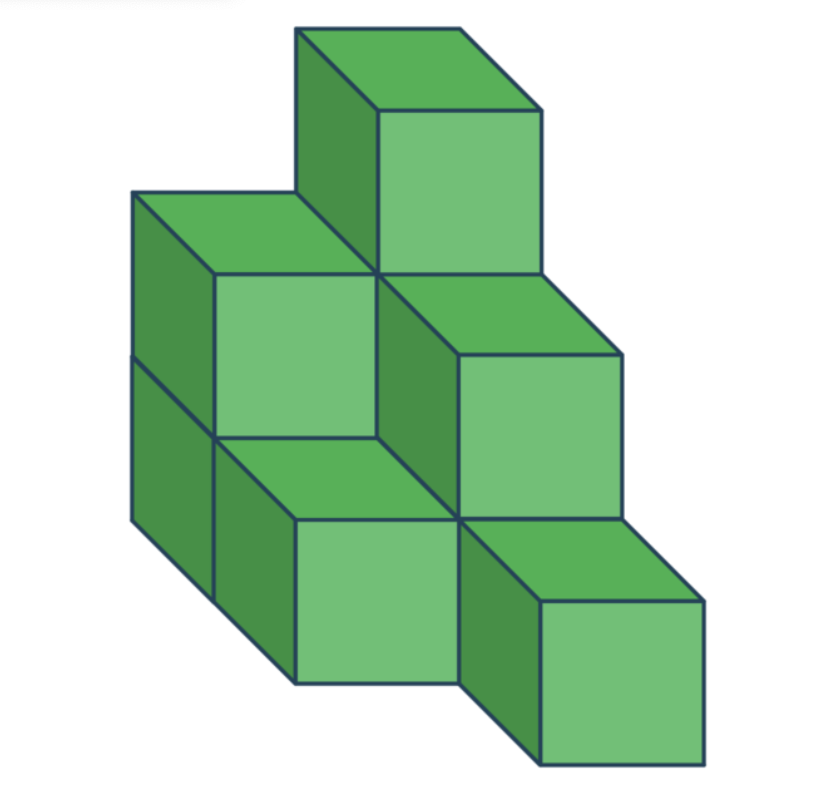

## Question #2

How many blocks are in this 3D tower?

## Gemini Thoughts

The user wants to count the number of blocks in the provided 3D tower image. I will count each individual cube that makes up the structure.

Row 1 (bottom): 3 blocks
Row 2: 3 blocks
Row 3: 2 blocks
Row 4 (top): 1 block

Total blocks = 3 + 3 + 2 + 1 = 9

## Gemini Answer

There are 9 blocks in this 3D tower.

## Ground Truth

There are 9 blocks.

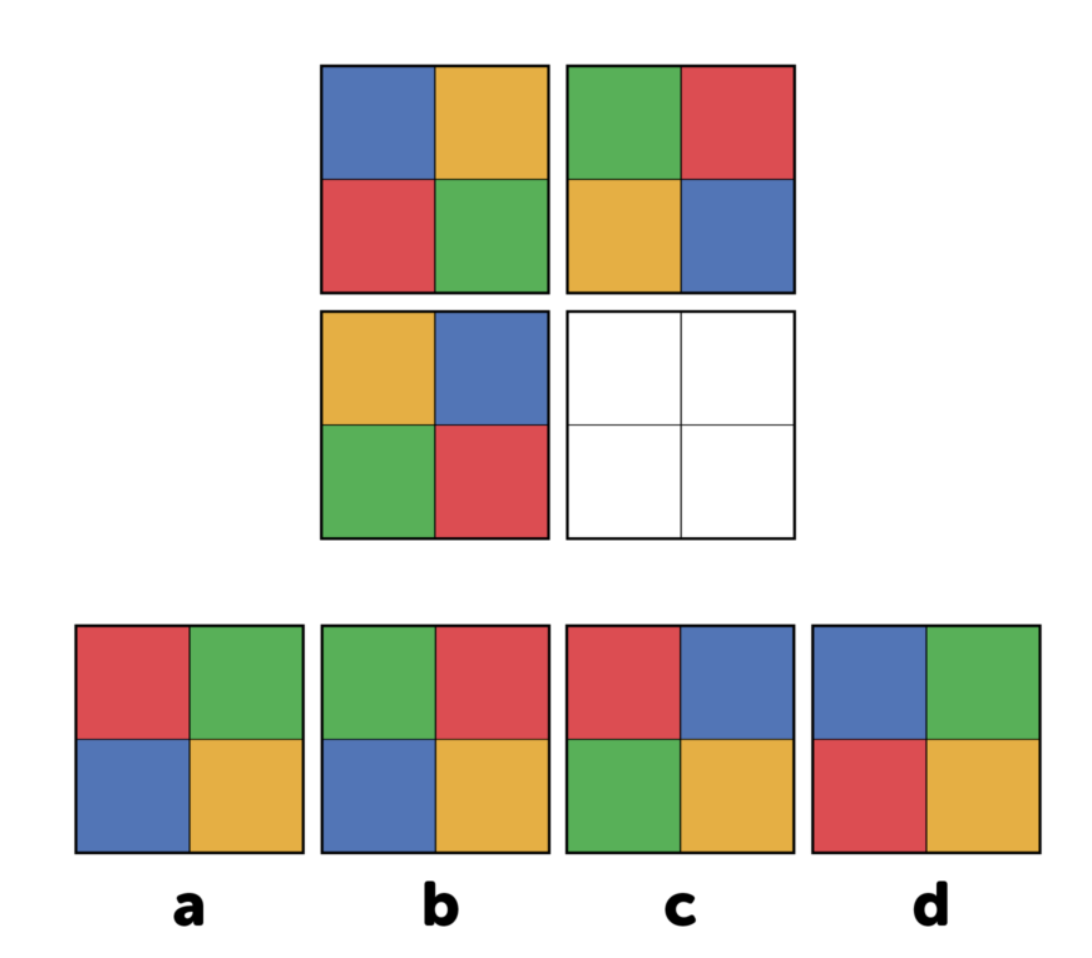

## Question #1

Which patterned block goes in the fourth spot?

## Gemini Thoughts

The user has provided an image with a sequence of 2x2 blocks with colored squares. The first three blocks are filled, and the fourth block is empty. The user wants to know which of the four options (a, b, c, d) would correctly fill the empty spot.

Let's analyze the relationship between the first three blocks.

Block 1:
Top Left: Blue
Top Right: Orange
Bottom Left: Red
Bottom Right: Green

Block 2:
Top Left: Green
Top Right: Red
Bottom Left: Orange
Bottom Right: Blue

Block 3:
Top Left: Orange
Top Right: Blue
Bottom Left: Green
Bottom Right: Red

Let's compare Block 1 and Block 2. The colors seem to be rotated clockwise.
If we rotate Block 1 clockwise:
Top Left (Blue) -> Top Right
Top Right (Orange) -> Bottom Right
Bottom Right (Green) -> Bottom Left
Bottom Left (Red) -> Top Left

This matches Block 2.

Now let's compare Block 2 and Block 3. Rotate Block 2 clockwise:
Top Left (Green) -> Top Right
Top Right (Red) -> Bottom Right
Bottom Right (Blue) -> Bottom Left
Bottom Left (Orange) -> Top Left

This matches Block 3.

So the pattern is a clockwise rotation of the colors in each subsequent block.

Now let's apply this pattern to Block 3 to find the missing Block 4. Rotate Block 3 clockwise:
Top Left (Orange) -> Top Right
Top Right (Blue) -> Bottom Right
Bottom Right (Red) -> Bottom Left
Bottom Left (Green) -> Top Left

So the missing block should have:
Top Left: Green
Top Right: Orange
Bottom Left: Red
Bottom Right: Blue

Now let's compare this with the options:
a: Top Left: Red, Top Right: Green, Bottom Left: Blue, Bottom Right: Orange - Incorrect
b: Top Left: Green, Top Right: Red, Bottom Left: Blue, Bottom Right: Orange - Incorrect
c: Top Left: Blue, Top Right: Red, Bottom Left: Green, Bottom Right: Orange - Incorrect
d: Top Left: Blue, Top Right: Orange, Bottom Left: Red, Bottom Right: Green - This is the same as the first block.

Let's re-examine the rotations.

Block 1 to Block 2:
Blue -> Top Right
Orange -> Bottom Right
Green -> Bottom Left
Red -> Top Left

Block 2 to Block 3:
Green -> Top Right
Red -> Bottom Right
Blue -> Bottom Left
Orange -> Top Left

The pattern appears to be a clockwise rotation of the entire block.

Let's apply the rotation to Block 3 to find Block 4.
Top Left (Orange) goes to Top Right.
Top Right (Blue) goes to Bottom Right.
Bottom Right (Red) goes to Bottom Left.
Bottom Left (Green) goes to Top Left.

So Block 4 should have:
Top Left: Green
Top Right: Orange
Bottom Left: Red
Bottom Right: Blue

Let's compare this with the options.
Option a: Top Left: Red, Top Right: Green, Bottom Left: Blue, Bottom Right: Orange
Option b: Top Left: Green, Top Right: Red, Bottom Left: Blue, Bottom Right: Orange
Option c: Top Left: Blue, Top Right: Red, Bottom Left: Green, Bottom Right: Orange
Option d: Top Left: Blue, Top Right: Orange, Bottom Left: Red, Bottom Right: Green

It looks like I made a mistake in the previous comparison.
The rotated Block 3 should have:
Top Left: Green
Top Right: Orange
Bottom Left: Red
Bottom Right: Blue

Comparing with options:
a: Incorrect
b: Incorrect
c: Incorrect
d: Incorrect

Let's retry the rotation.

Block 1:  BL OR, RD GR
Block 2:  GR RD, OR BL
Block 3:  OR BL, GR RD

Rotation from Block 1 to Block 2:
Top Left -> Top Right
Top Right -> Bottom Right
Bottom Right -> Bottom Left
Bottom Left -> Top Left

Applying the same rotation to Block 3:
Top Left (Orange) -> Top Right
Top Right (Blue) -> Bottom Right
Bottom Right (Red) -> Bottom Left
Bottom Left (Green) -> Top Left

So Block 4 should be:
Top Left: Green
Top Right: Orange
Bottom Left: Red
Bottom Right: Blue

Let's look at the options again:
a: Top Left: Red, Top Right: Green, Bottom Left: Blue, Bottom Right: Orange
b: Top Left: Green, Top Right: Red, Bottom Left: Blue, Bottom Right: Orange
c: Top Left: Blue, Top Right: Red, Bottom Left: Green, Bottom Right: Orange
d: Top Left: Blue, Top Right: Orange, Bottom Left: Red, Bottom Right: Green

None of the options match my expected result. Let's re-evaluate the pattern.

Could it be a reflection or swapping of positions?

From Block 1 to Block 2: Top row swapped with bottom row, then elements within rows swapped.
Block 1: BL OR, RD GR
Block 2: RD GR, BL OR -> GR RD, OR BL

From Block 2 to Block 3: Top row swapped with bottom row, then elements within rows swapped.
Block 2: GR RD, OR BL
Block 3: OR BL, GR RD -> BL OR, RD GR

This pattern doesn't seem consistent.

Let's go back to the simple clockwise rotation.

Block 1: BL OR, RD GR
Block 2: GR RD, OR BL
Block 3: OR BL, GR RD

If we consider the colors individually in each position:
Top Left: Blue -> Green -> Orange
Top Right: Orange -> Red -> Blue
Bottom Left: Red -> Orange -> Green
Bottom Right: Green -> Blue -> Red

The sequence of colors for each position is cyclic.
Top Left: Blue -> Green -> Orange -> Red
Top Right: Orange -> Red -> Blue -> Green
Bottom Left: Red -> Orange -> Green -> Blue
Bottom Right: Green -> Blue -> Red -> Orange

So, for the fourth block:
Top Left: Red
Top Right: Green
Bottom Left: Blue
Bottom Right: Orange

This matches option 'a'.

## Gemini Answer

Let's analyze the pattern between the given blocks.

Block 1:
Top Left: Blue
Top Right: Orange
Bottom Left: Red
Bottom Right: Green

Block 2:
Top Left: Green
Top Right: Red
Bottom Left: Orange
Bottom Right: Blue

Block 3:
Top Left: Orange
Top Right: Blue
Bottom Left: Green
Bottom Right: Red

Let's trace the movement of each color in the top-left position: Blue (Block 1) -> Green (Block 2) -> Orange (Block 3). Following this cycle, the next color should be Red.

Now let's do the same for the top-right position: Orange (Block 1) -> Red (Block 2) -> Blue (Block 3). Following this cycle, the next color should be Green.

For the bottom-left position: Red (Block 1) -> Orange (Block 2) -> Green (Block 3). Following this cycle, the next color should be Blue.

For the bottom-right position: Green (Block 1) -> Blue (Block 2) -> Red (Block 3). Following this cycle, the next color should be Orange.

So, the fourth block should have:
Top Left: Red
Top Right: Green
Bottom Left: Blue
Bottom Right: Orange

Comparing this to the options:
a: Top Left: Red, Top Right: Green, Bottom Left: Blue, Bottom Right: Orange
b: Top Left: Green, Top Right: Red, Bottom Left: Blue, Bottom Right: Orange
c: Top Left: Blue, Top Right: Red, Bottom Left: Green, Bottom Right: Orange
d: Top Left: Blue, Top Right: Orange, Bottom Left: Red, Bottom Right: Green

The pattern of the fourth block matches option 'a'.

Final Answer: The final answer is $\boxed{a}$

## Ground Truth

Opposite squares are exchanged in this problem, so the answer is A.

In [ ]:

# Define the folder path
folder_path = "brain_teasers"

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        # Grab file name
        filename = filename.split('.')[0]
        # Grab file number
        filenumber = filename.split('_')[2]
        
        # Load the image
        image = Image.open(file_path)
        display(image)

        # Grab the queston and answer from their dictionaries
        contents = questions_dict.get(filename)
        ground_truth = answers_dict.get(filename)

        # Generate content from Gemini
        response = client.models.generate_content(
                                                    model=model,
                                                    contents=[
                                                        image,
                                                        contents
                                                    ]
                                                )
        # Display Q&A info
        display(Markdown(f"## Question #{filenumber}"))
        display(Markdown(contents))
        display(Markdown("## Gemini Thoughts"))
        display(Markdown(response.candidates[0].content.parts[0].text))
        display(Markdown("## Gemini Answer"))
        display(Markdown(response.candidates[0].content.parts[1].text))
        display(Markdown("## Ground Truth"))
        display(Markdown(ground_truth))
        
        # For API rate limiting, wait a minute
        time.sleep(60)


# MATH Vision Dataset

### Load Dataset from HuggingFace

In [ ]:
splits = {'test': 'data/test-00000-of-00001-3532b8d3f1b4047a.parquet', 'testmini': 'data/testmini-00000-of-00001-f8ff70fcb2f29b1d.parquet'}

In [170]:
dataset = load_dataset("MathLLMs/MathVision")
print(dataset)
df = pd.read_parquet("hf://datasets/MathLLMs/MathVision/" + splits["testmini"])
df

DatasetDict({
    test: Dataset({
        features: ['id', 'question', 'options', 'image', 'decoded_image', 'answer', 'solution', 'level', 'subject'],
        num_rows: 3040
    })
    testmini: Dataset({
        features: ['id', 'question', 'options', 'image', 'decoded_image', 'answer', 'solution', 'level', 'subject'],
        num_rows: 304
    })
})


,id,question,options,image,decoded_image,answer,solution,level,subject
0,4,How many different digits can you find in this...,[],images/4.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,6,None,1,counting
1,5,Which number do you have to write in the last ...,[],images/5.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,61,None,2,arithmetic
2,6,Misty the cat has five kittens: two of them ar...,"[A, B, C, D, E]",images/6.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,D,None,3,logic
3,7,How many bricks are missing in the wall?\n<ima...,[],images/7.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,6,None,1,counting
4,8,The sums of the all the three numbers on each ...,[],images/8.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,None,2,arithmetic
...,...,...,...,...,...,...,...,...,...
299,2774,"One sunny day, Ling decided to take a hike in ...","[A, B, C, D, E]",images/2774.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,E,None,2,statistics
300,2786,Malaika is skiing on a mountain. The graph bel...,[],images/2786.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,8,None,2,statistics
301,2955,"If the point $(3,4)$ is reflected in the $x$-a...",[],images/2955.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"(3,-4)","After reflecting the point $(3,4)$ in the $x$-...",2,analytic geometry
302,2984,The lines $y = -2x + 8$ and $y = \frac{1}{2} x...,[],images/2984.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,45,We first determine where the lines $y=-2x+8$ a...,5,analytic geometry


### Inspect Images

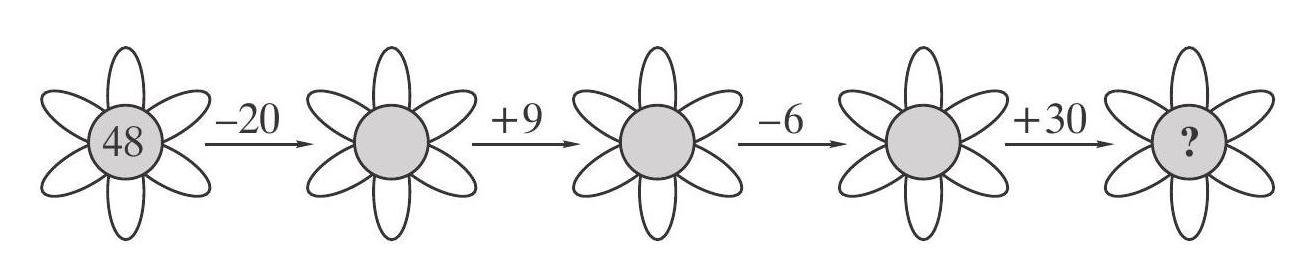

In [ ]:
# the filepath
path = os.getcwd()

# Specify the directory where the images are stored
image_directory = f'{path}/MATH_images/images'

# Function to load an image given its filename
def load_image(filename):
    # Correct the filename
    corrected_filename = filename.split("/")[1]
    # Load the image
    loaded_image = Image.open(os.path.join(image_directory, corrected_filename))
    return loaded_image

# Load the images into a list
images = [load_image(filename) for filename in image_directory]

# Example: display the first image
display(images[1])

### Loop through Q&As with LLM as a Judge

In [182]:
# Filepath and directory setup
path = os.getcwd()
image_directory = f'{path}/MATH_images/images'

# Models
model_student = "gemini-2.0-flash-thinking-exp"
model_teacher = "gemini-2.0-flash-exp"

# Initialize counter and start time
request_count = 0
start_time = time.time()

# Loop through the DataFrame
for index, row in tqdm(df.iterrows(), total=len(df)):
    # Grab Q&A components
    question = row['question']
    solution = row['solution']
    answer = row['answer']
    options = row['options']
    
    # If there are answer choices add them to the quesion
    if len(options) > 0 :
        question += f'\nYour answer choices are: {options}'

    # Correct the filename
    filename = row['image'].split('/')[1]
    
    # Load the image
    loaded_image = Image.open(os.path.join(image_directory, filename))

    # Student: Generate content from Gemini
    response = client.models.generate_content(
                                                model=model_student,
                                                contents=[
                                                    loaded_image,
                                                    question
                                                ]
                                            )

    # Student Response
    student_thoughts = response.candidates[0].content.parts[0].text
    student_answer = response.candidates[0].content.parts[1].text

    # Append to DataFrame
    df.loc[index, 'Student Thoughts'] = student_thoughts
    df.loc[index, 'Student Answer'] = student_answer

    # Combine thoughts and answer if not None
    if student_thoughts is not None:
        student_answer = student_thoughts + ' ' + student_answer
    if solution is not None:
        answer = solution + ' ' + answer

    # Teacher Prompt
    teacher_prompt = f""" 
    INSTRUCTION:
    You are the Teacher and have been asked to grade a Student's response from their Math homework. 
    Please only give the grade of 'Correct' or 'Incorrect'.

    QUESTION: {question}

    STUDENT RESPONSE: {student_answer}
    
    CORRECT ANSWER: {answer}
    
    YOUR GRADE: """

    # Teacher: Generate content from Gemini
    teacher_response = client.models.generate_content(
                                                        model=model_teacher,
                                                        contents=[
                                                            teacher_prompt
                                                        ]
                                                    )

    # Teacher Response
    teacher_grade = teacher_response.candidates[0].content.parts[0].text.strip("\n")

    # Append to DataFrame
    df.loc[index, 'Teacher Grade'] = teacher_grade

    # Increment request count (1 for Student and 1 for Teacher)
    request_count += 2

    # Check if rate limit is reached
    if request_count >= 8:
        elapsed_time = time.time() - start_time
        if elapsed_time < 70:
            time.sleep(70 - elapsed_time)  
        # Reset counter and start time
        request_count = 0
        start_time = time.time()
    
    # For API rate limiting, wait a minute
    time.sleep(1)


  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [13:40<00:00, 22.78s/it]


In [190]:
df

,id,question,options,image,decoded_image,answer,solution,level,subject,Student Thoughts,Student Answer,Teacher Grade
0,4,How many different digits can you find in this...,[],images/4.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,6,None,1,counting,The user wants to identify the different numer...,There are two different digits in the picture:...,Incorrect
1,5,Which number do you have to write in the last ...,[],images/5.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,61,None,2,arithmetic,The user wants to find the missing number in t...,"To find the number in the last daisy, we need ...",Correct
2,6,Misty the cat has five kittens: two of them ar...,"[A, B, C, D, E]",images/6.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,D,None,3,logic,The user is asking to identify the picture tha...,The answer is **A**.\n\nHere's why:\n\n* **Num...,Incorrect
3,7,How many bricks are missing in the wall?\n<ima...,[],images/7.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,6,None,1,counting,The user wants to know how many bricks are mis...,There are **11** bricks missing in the wall.,Incorrect
4,8,The sums of the all the three numbers on each ...,[],images/8.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,None,2,arithmetic,\nThe problem asks for the sum of two unknown ...,Solution:\nLet the three sides of the triangle...,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...
299,2774,"One sunny day, Ling decided to take a hike in ...","[A, B, C, D, E]",images/2774.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,E,None,2,statistics,Let's analyze the problem step by step.\n\n**S...,Let's analyze Ling's trip in stages:\n\n**Stag...,Correct
300,2786,Malaika is skiing on a mountain. The graph bel...,[],images/2786.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,8,None,2,statistics,The user is asking for the total time Malaika ...,To find the total time Malaika spends at an el...,Incorrect
301,2955,"If the point $(3,4)$ is reflected in the $x$-a...",[],images/2955.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"(3,-4)","After reflecting the point $(3,4)$ in the $x$-...",2,analytic geometry,The question asks for the coordinates of the i...,"To reflect a point in the $x$-axis, the $x$-co...",Correct
302,2984,The lines $y = -2x + 8$ and $y = \frac{1}{2} x...,[],images/2984.jpg,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,45,We first determine where the lines $y=-2x+8$ a...,5,analytic geometry,The problem asks for the area of a triangle fo...,Solution:\nThe problem asks for the area of th...,Correct


In [191]:
df['Teacher Grade'].value_counts()

Teacher Grade
Correct      156
Incorrect    148
Name: count, dtype: int64

In [219]:
# Example value counts from your DataFrame
value_counts = df['Teacher Grade'].value_counts()

# Get the number of 'Correct' and 'Total' grades
num_correct = value_counts.get('Correct', 0)
total_grades = value_counts.sum()

# Calculate the proportion of 'Correct' grades
proportion_correct = num_correct / total_grades

# Print the result
print(f"Final Grade: {round(proportion_correct*100, 2)}%")


Final Grade: 51.32%


In [256]:
df.to_csv('MATH_VISION_TEST_RESULTS.csv', index=False)

In [259]:
# df = pd.read_csv('MATH_VISION_TEST_RESULTS.csv')
# df.head()

### Inspect Q&As

### **Question 303**:

In triangle $ABC$, $\angle BAC = 72^\circ$.  The incircle of triangle $ABC$ touches sides $BC$, $AC$, and $AB$ at $D$, $E$, and $F$, respectively.  Find $\angle EDF$, in degrees.

<image1>

### **Image**:

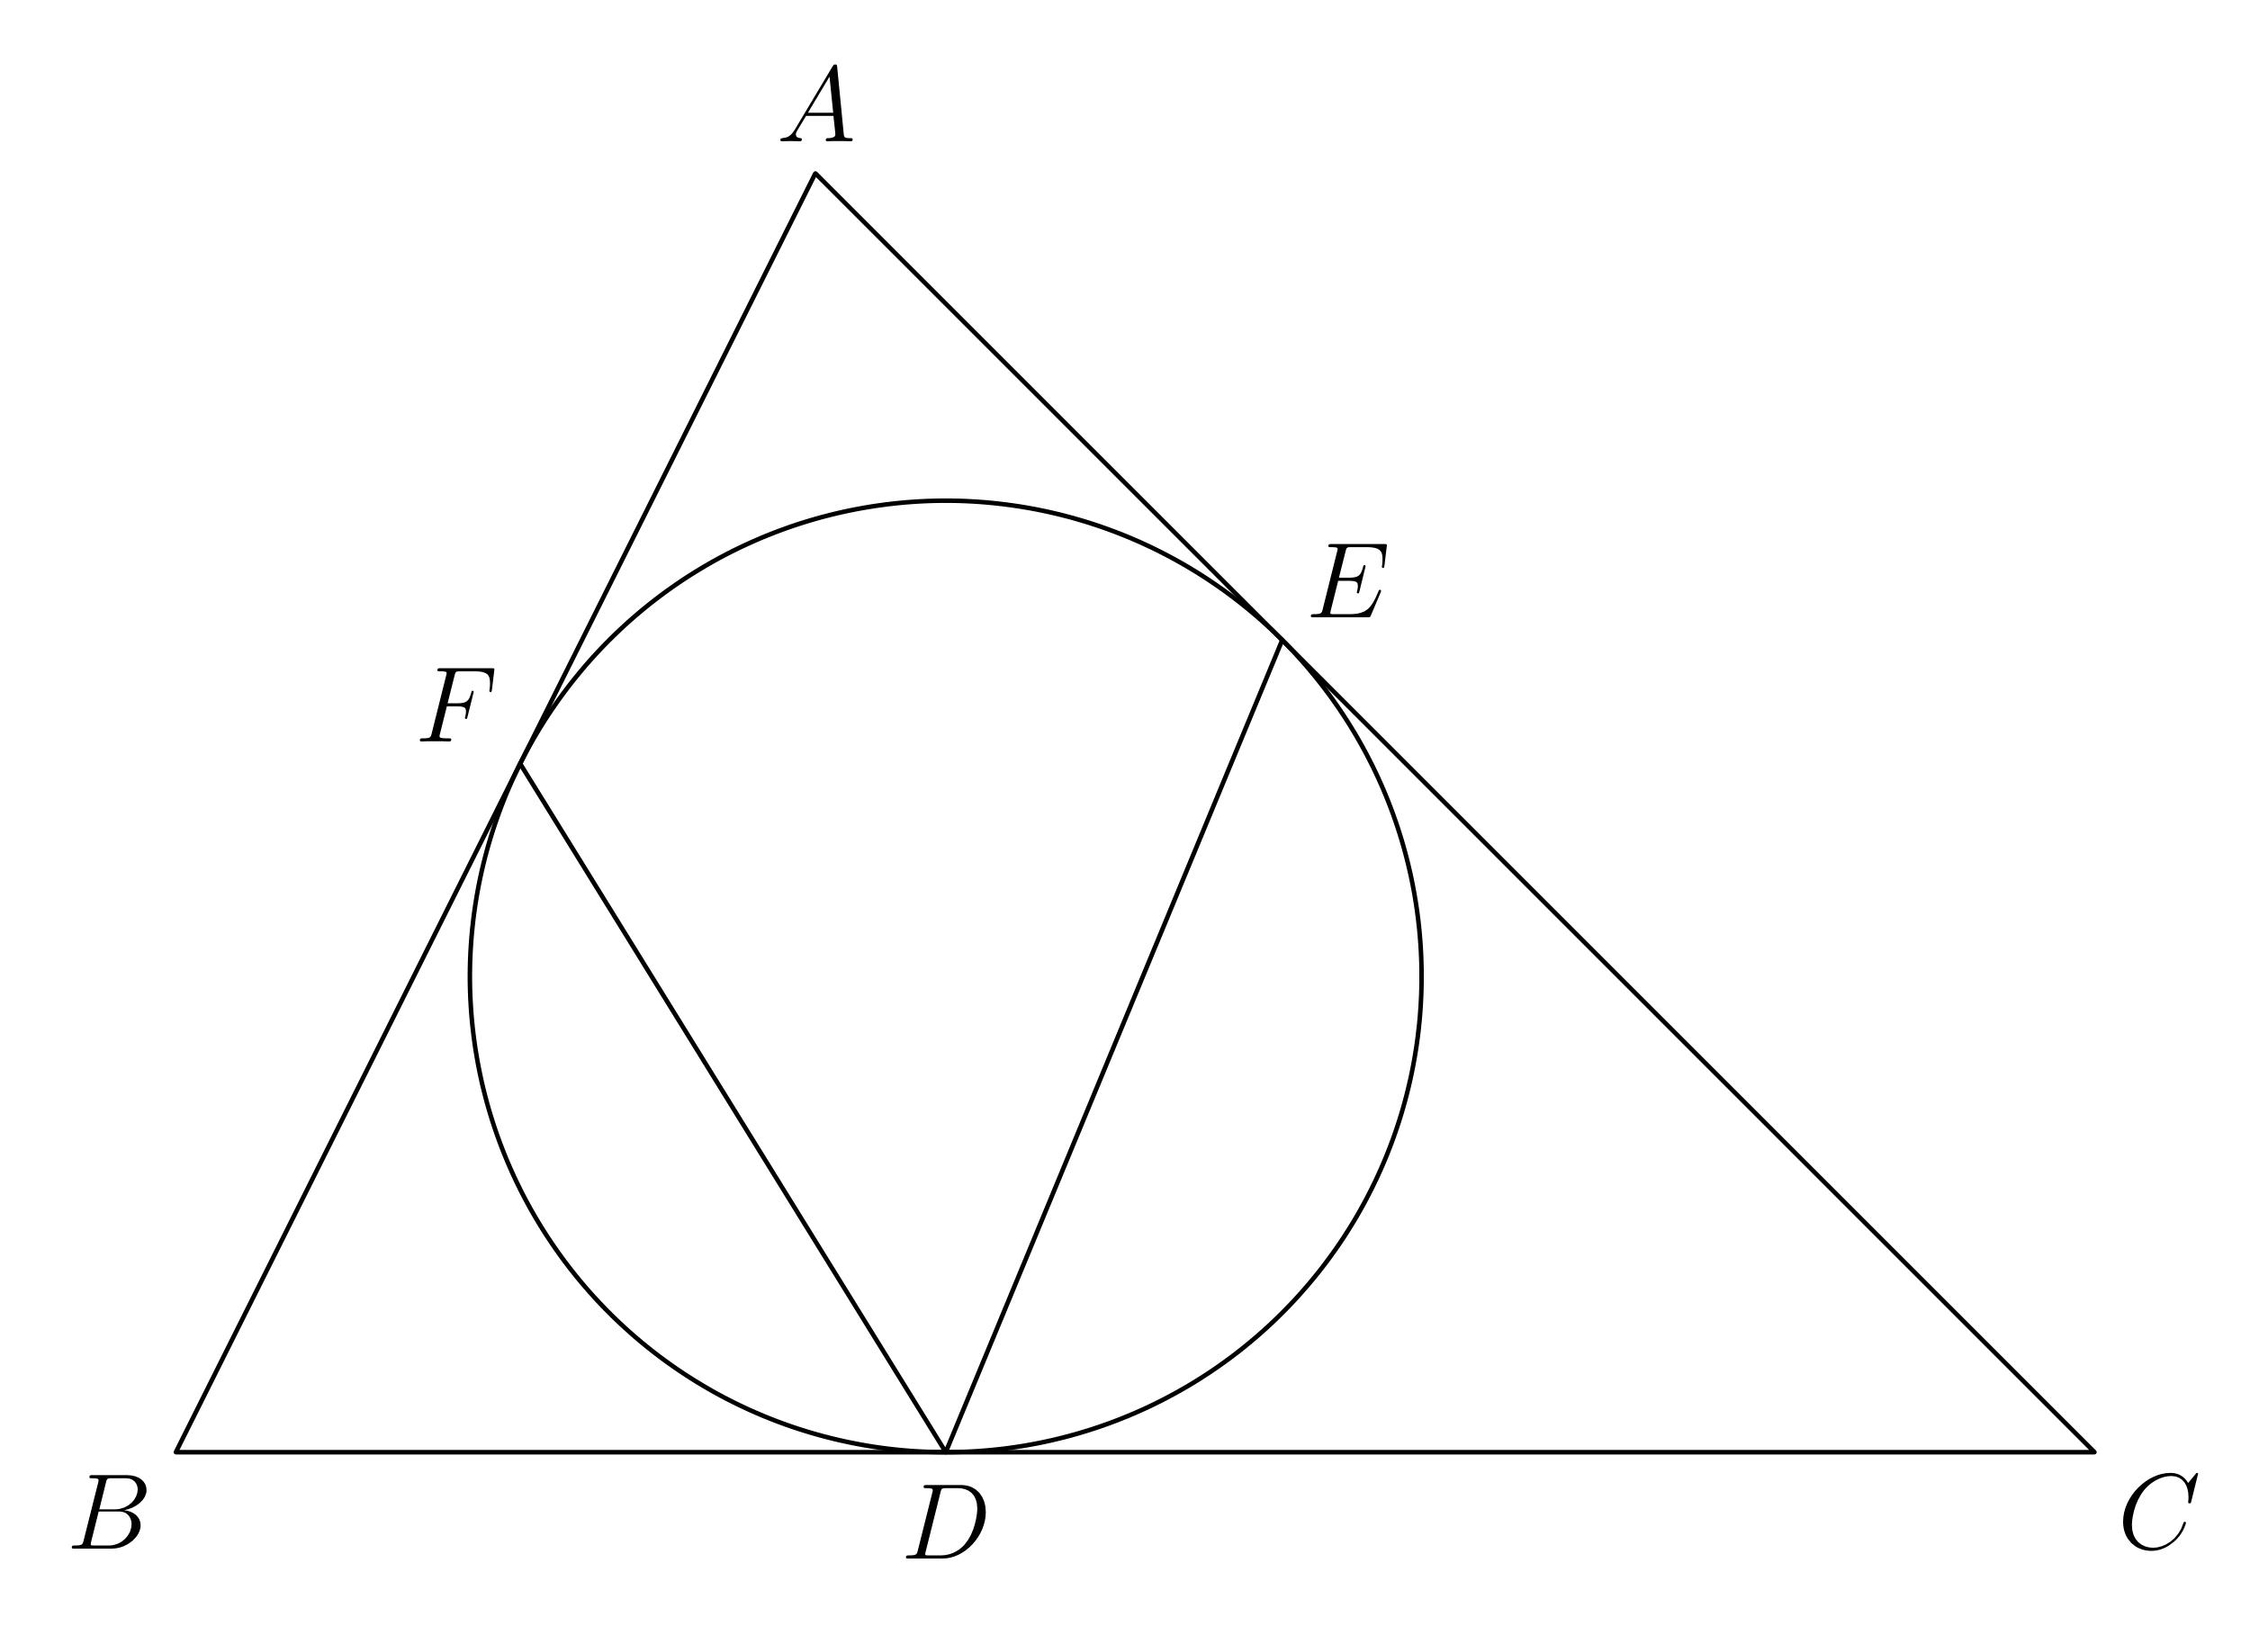

### **Correct Answer**:

54

### **Student Thoughts**:


The problem asks for the measure of angle $\angle EDF$, where $D, E, F$ are the points where the incircle of triangle $ABC$ touches the sides $BC, AC, AB$. We are given that $\angle BAC = 72^\circ$.

Let the incircle have center $I$. The segments from the center of the incircle to the points of tangency are perpendicular to the sides of the triangle. Thus, $ID \perp BC$, $IE \perp AC$, and $IF \perp AB$.

Consider the quadrilateral $AEIF$. The angles at $E$ and $F$ are right angles, i.e., $\angle AEI = 90^\circ$ and $\angle AFI = 90^\circ$. The sum of the angles in a quadrilateral is $360^\circ$. Therefore, in quadrilateral $AEIF$, we have:
$\angle EAF + \angle AEI + \angle EIF + \angle IFA = 360^\circ$
$\angle BAC + 90^\circ + \angle EIF + 90^\circ = 360^\circ$
$72^\circ + 90^\circ + \angle EIF + 90^\circ = 360^\circ$
$252^\circ + \angle EIF = 360^\circ$
$\angle EIF = 360^\circ - 252^\circ = 108^\circ$

Now, consider the triangle $IEF$. We know that $IE = IF$ because they are radii of the incircle. Thus, triangle $IEF$ is an isosceles triangle with $IE = IF$. The angles opposite the equal sides are equal, so $\angle IEF = \angle IFE$.
The sum of the angles in triangle $IEF$ is $180^\circ$:
$\angle EIF + \angle IEF + \angle IFE = 180^\circ$
$108^\circ + \angle IEF + \angle IEF = 180^\circ$
$2 \angle IEF = 180^\circ - 108^\circ = 72^\circ$
$\angle IEF = \frac{72^\circ}{2} = 36^\circ$
So, $\angle IEF = \angle IFE = 36^\circ$.

Next, consider the angles at vertex $A$. We have $\angle BAC = 72^\circ$.
The line segment from the vertex to the center of the incircle bisects the angle at the vertex. Thus, $\angle BAI = \angle CAI = \frac{1}{2} \angle BAC = \frac{1}{2} (72^\circ) = 36^\circ$.

Now, let's consider the angles around point $I$. We have $\angle EIF = 108^\circ$.

Consider the angles at the center $I$ subtended by the sides of the contact triangle $DEF$.
The angles we are interested in are $\angle DIF$, $\angle DIE$, and $\angle EIF$.

Consider the quadrilateral $BFID$. We have $\angle FBD = \angle B$, $\angle BFI = 90^\circ$, $\angle BDI = 90^\circ$.
The sum of the angles is $360^\circ$:
$\angle B + 90^\circ + \angle FID + 90^\circ = 360^\circ$
$\angle B + 180^\circ + \angle FID = 360^\circ$
$\angle FID = 360^\circ - 180^\circ - \angle B = 180^\circ - \angle B$.

Similarly, consider the quadrilateral $CDIE$.
$\angle C + 90^\circ + \angle EID + 90^\circ = 360^\circ$
$\angle C + 180^\circ + \angle EID = 360^\circ$
$\angle EID = 180^\circ - \angle C$.

We know that $\angle A + \angle B + \angle C = 180^\circ$.
$72^\circ + \angle B + \angle C = 180^\circ$
$\angle B + \angle C = 180^\circ - 72^\circ = 108^\circ$.

Now, consider the sum of the angles around point $I$:
$\angle EIF + \angle FID + \angle DIE = 360^\circ$
$108^\circ + (180^\circ - \angle B) + (180^\circ - \angle C) = 360^\circ$
$108^\circ + 180^\circ - \angle B + 180^\circ - \angle C = 360^\circ$
$468^\circ - (\angle B + \angle C) = 360^\circ$
$468^\circ - 108^\circ = 360^\circ$
$360^\circ = 360^\circ$. This confirms our calculations so far.

We need to find $\angle EDF$. Consider triangle $BDF$. $BD = BF$ (tangents from a point to a circle are equal). Thus, triangle $BDF$ is isosceles with $BD = BF$.
$\angle BFD = \angle BDF$.
The sum of angles in triangle $BDF$: $\angle B + \angle BFD + \angle BDF = 180^\circ$
$\angle B + 2 \angle BDF = 180^\circ$
$2 \angle BDF = 180^\circ - \angle B$
$\angle BDF = 90^\circ - \frac{1}{2} \angle B$.

Similarly, consider triangle $CDE$. $CD = CE$. Triangle $CDE$ is isosceles with $CD = CE$.
$\angle CDE = \angle CED$.
The sum of angles in triangle $CDE$: $\angle C + \angle CDE + \angle CED = 180^\circ$
$\angle C + 2 \angle CDE = 180^\circ$
$2 \angle CDE = 180^\circ - \angle C$
$\angle CDE = 90^\circ - \frac{1}{2} \angle C$.

Consider triangle $AEF$. $AE = AF$. Triangle $AEF$ is isosceles with $AE = AF$.
$\angle AFE = \angle AEF$.
The sum of angles in triangle $AEF$: $\angle A + \angle AFE + \angle AEF = 180^\circ$
$\angle A + 2 \angle AFE = 180^\circ$
$2 \angle AFE = 180^\circ - \angle A$
$\angle AFE = 90^\circ - \frac{1}{2} \angle A = 90^\circ - \frac{1}{2} (72^\circ) = 90^\circ - 36^\circ = 54^\circ$.
So, $\angle AFE = \angle AEF = 54^\circ$.

Now, let's find the angles of triangle $DEF$.
Consider the angles around vertex $D$: $\angle BDF + \angle FDE + \angle EDC = 180^\circ$ (angles on a straight line).
$\angle FDE = 180^\circ - \angle BDF - \angle EDC$
$\angle FDE = 180^\circ - (90^\circ - \frac{1}{2} \angle B) - (90^\circ - \frac{1}{2} \angle C)$
$\angle FDE = 180^\circ - 90^\circ + \frac{1}{2} \angle B - 90^\circ + \frac{1}{2} \angle C$
$\angle FDE = \frac{1}{2} \angle B + \frac{1}{2} \angle C = \frac{1}{2} (\angle B + \angle C)$
We know $\angle B + \angle C = 108^\circ$.
$\angle FDE = \frac{1}{2} (108^\circ) = 54^\circ$.

Similarly, consider the angles around vertex $E$: $\angle AED + \angle DEF + \angle FEC = 180^\circ$.
$\angle DEF = 180^\circ - \angle AED - \angle FEC$
$\angle AED = \angle AEF = 54^\circ$.
$\angle FEC = \angle EDC = 90^\circ - \frac{1}{2} \angle C$.

Something is wrong here. Let's use a different approach.

Consider the angles at the vertices of triangle $DEF$.

At vertex $D$:
$\angle BDC = 180^\circ$.
$\angle BDF + \angle FDE + \angle EDC = 180^\circ$.
We have $\angle BDF = 90^\circ - \frac{1}{2} \angle B$ and $\angle CDE = 90^\circ - \frac{1}{2} \angle C$.
$\angle FDE = 180^\circ - (90^\circ - \frac{1}{2} \angle B) - (90^\circ - \frac{1}{2} \angle C) = \frac{1}{2} (\angle B + \angle C)$.

At vertex $E$:
$\angle AEB$ is not a straight line.
Consider the angles around point $E$ on side $AC$.
$\angle AEB$, $\angle BEC$.
Consider the angles of triangle $DEF$.

We need to find $\angle EDF$.
We found $\angle FDE = \frac{1}{2} (\angle B + \angle C)$.
Since $\angle A + \angle B + \angle C = 180^\circ$, we have $\angle B + \angle C = 180^\circ - \angle A$.
$\angle FDE = \frac{1}{2} (180^\circ - \angle A) = 90^\circ - \frac{1}{2} \angle A$.

Given $\angle BAC = \angle A = 72^\circ$.
$\angle EDF = \angle FDE = 90^\circ - \frac{1}{2} (72^\circ) = 90^\circ - 36^\circ = 54^\circ$.

Let's verify this result by finding the other angles of triangle $DEF$.

Angle at vertex $E$: $\angle DEF$.
Consider the angles around point $E$ on side $AC$.
We have $\angle AEF$ and $\angle CED$.
Consider triangle $AEF$, isosceles with $AE = AF$.
$\angle AFE = \angle AEF = 90^\circ - \frac{1}{2} \angle A$.

Consider triangle $CDE$, isosceles with $CD = CE$.
$\angle CDE = \angle CED = 90^\circ - \frac{1}{2} \angle C$.

Consider the angles around point $E$: $\angle AEC = 180^\circ$.
$\angle AEF + \angle FED + \angle DEC = 180^\circ$.
$\angle DEF = 180^\circ - \angle AEF - \angle DEC$.
$\angle DEF = 180^\circ - (90^\circ - \frac{1}{2} \angle A) - (90^\circ - \frac{1}{2} \angle C)$
$\angle DEF = 180^\circ - 90^\circ + \frac{1}{2} \angle A - 90^\circ + \frac{1}{2} \angle C$
$\angle DEF = \frac{1}{2} \angle A + \frac{1}{2} \angle C = \frac{1}{2} (\angle A + \angle C)$.

Angle at vertex $F$: $\angle DFE$.
Consider the angles around point $F$ on side $AB$.
$\angle AFB = 180^\circ$.
$\angle AFD + \angle DFE + \angle EFB = 180^\circ$.
$\angle DFE = 180^\circ - \angle AFD - \angle EFB$.

Consider triangle $BDF$, isosceles with $BD = BF$.
$\angle BDF = \angle BFD = 90^\circ - \frac{1}{2} \angle B$.

Consider triangle $AEF$, $\angle AFE = 90^\circ - \frac{1}{2} \angle A$.

$\angle AFD = \angle AFE = 90^\circ - \frac{1}{2} \angle A$.
$\angle BFE = \angle BFD = 90^\circ - \frac{1}{2} \angle B$.

$\angle DFE = 180^\circ - (90^\circ - \frac{1}{2} \angle A) - (90^\circ - \frac{1}{2} \angle B)$
$\angle DFE = 180^\circ - 90^\circ + \frac{1}{2} \angle A - 90^\circ + \frac{1}{2} \angle B$
$\angle DFE = \frac{1}{2} \angle A + \frac{1}{2} \angle B = \frac{1}{2} (\angle A + \angle B)$.

The angles of the contact triangle $DEF$ are:
$\angle EDF = 90^\circ - \frac{1}{2} \angle A$
$\angle DEF = 90^\circ - \frac{1}{2} \angle B$
$\angle DFE = 90^\circ - \frac{1}{2} \angle C$

Let's check the sum of the angles:
$(90^\circ - \frac{1}{2} \angle A) + (90^\circ - \frac{1}{2} \angle B) + (90^\circ - \frac{1}{2} \angle C)$
$= 270^\circ - \frac{1}{2} (\angle A + \angle B + \angle C)$
$= 270^\circ - \frac{1}{2} (180^\circ) = 270^\circ - 90^\circ = 180^\circ$.
The sum of angles is correct.

Now, we can find the specific angle $\angle EDF$.
$\angle EDF = 90^\circ - \frac{1}{2} \angle BAC = 90^\circ - \frac{1}{2} (72^\circ) = 90^\circ - 36^\circ = 54^\circ$.

Alternative approach using angles at the incenter.
Consider triangle $IEF$. It is isosceles with $IE = IF$.
$\angle EIF = 180^\circ - \angle A$.
$\angle IEF = \angle IFE = \frac{1}{2} (180^\circ - (180^\circ - \angle A)) = \frac{1}{2} \angle A$.

Consider triangle $IDF$. Isosceles with $ID = IF$.
$\angle DIF = 180^\circ - \angle B$.
$\angle IDF = \angle IFD = \frac{1}{2} (180^\circ - (180^\circ - \angle B)) = \frac{1}{2} \angle B$.

Consider triangle $IDE$. Isosceles with $ID = IE$.
$\angle DIE = 180^\circ - \angle C$.
$\angle IDE = \angle IED = \frac{1}{2} (180^\circ - (180^\circ - \angle C)) = \frac{1}{2} \angle C$.

Now, consider the angle $\angle EDF$.
$\angle EDF = \angle IDE + \angle IDF$.
$\angle EDF = \frac{1}{2} \angle C + \frac{1}{2} \angle B = \frac{1}{2} (\angle B + \angle C)$.

Since $\angle A + \angle B + \angle C = 180^\circ$, we have $\angle B + \angle C = 180^\circ - \angle A$.
$\angle EDF = \frac{1}{2} (180^\circ - \angle A) = 90^\circ - \frac{1}{2} \angle A$.

Given $\angle BAC = 72^\circ$, so $\angle A = 72^\circ$.
$\angle EDF = 90^\circ - \frac{1}{2} (72^\circ) = 90^\circ - 36^\circ = 54^\circ$.

Consider angle $\angle DEF$.
$\angle DEF = \angle DEI + \angle FEI$.
$\angle DEF = \frac{1}{2} \angle C + \frac{1}{2} \angle A = \frac{1}{2} (\angle A + \angle C)$.
$\angle DEF = \frac{1}{2} (180^\circ - \angle B) = 90^\circ - \frac{1}{2} \angle B$.

Consider angle $\angle DFE$.
$\angle DFE = \angle DFI + \angle EFI$.
$\angle DFE = \frac{1}{2} \angle B + \frac{1}{2} \angle A = \frac{1}{2} (\angle A + \angle B)$.
$\angle DFE = \frac{1}{2} (180^\circ - \angle C) = 90^\circ - \frac{1}{2} \angle C$.

This confirms the formulas derived earlier.

Final check of the calculations.
Given $\angle BAC = 72^\circ$.
We need to find $\angle EDF$.

Using the formula $\angle EDF = 90^\circ - \frac{1}{2} \angle A$.
$\angle EDF = 90^\circ - \frac{1}{2} (72^\circ) = 90^\circ - 36^\circ = 54^\circ$.

The angles of the contact triangle $DEF$ are related to the angles of the original triangle $ABC$.

The vertices of the contact triangle are the points where the incircle touches the sides.
The segments from the vertices of the contact triangle to the vertices of the original triangle are angle bisectors of the angles of the contact triangle.

Consider vertex $D$. Segments $DF$ and $DE$.
Consider triangle $BDF$, isosceles with $BD = BF$.
$\angle BFD = \angle BDF = 90^\circ - \frac{1}{2} \angle B$.

Consider triangle $CDE$, isosceles with $CD = CE$.
$\angle CED = \angle CDE = 90^\circ - \frac{1}{2} \angle C$.

Consider triangle $AEF$, isosceles with $AE = AF$.
$\angle AFE = \angle AEF = 90^\circ - \frac{1}{2} \angle A$.

At vertex $D$: $\angle BDC = 180^\circ$.
$\angle BDF + \angle FDE + \angle EDC = 180^\circ$.
$(90^\circ - \frac{1}{2} \angle B) + \angle FDE + (90^\circ - \frac{1}{2} \angle C) = 180^\circ$.
$180^\circ - \frac{1}{2} (\angle B + \angle C) + \angle FDE = 180^\circ$.
$\angle FDE = \frac{1}{2} (\angle B + \angle C) = \frac{1}{2} (180^\circ - \angle A) = 90^\circ - \frac{1}{2} \angle A$.

At vertex $E$: $\angle AEC = 180^\circ$.
$\angle AEF + \angle FED + \angle DEC = 180^\circ$.
$(90^\circ - \frac{1}{2} \angle A) + \angle DEF + (90^\circ - \frac{1}{2} \angle C) = 180^\circ$.
$180^\circ - \frac{1}{2} (\angle A + \angle C) + \angle DEF = 180^\circ$.
$\angle DEF = \frac{1}{2} (\angle A + \angle C) = \frac{1}{2} (180^\circ - \angle B) = 90^\circ - \frac{1}{2} \angle B$.

At vertex $F$: $\angle AFB = 180^\circ$.
$\angle AFD + \angle DFE + \angle EFB = 180^\circ$.
$(90^\circ - \frac{1}{2} \angle A) + \angle DFE + (90^\circ - \frac{1}{2} \angle B) = 180^\circ$.
$180^\circ - \frac{1}{2} (\angle A + \angle B) + \angle DFE = 180^\circ$.
$\angle DFE = \frac{1}{2} (\angle A + \angle B) = \frac{1}{2} (180^\circ - \angle C) = 90^\circ - \frac{1}{2} \angle C$.

The formulas are consistent. Plugging in the value of $\angle A$:
$\angle EDF = 90^\circ - \frac{1}{2} (72^\circ) = 54^\circ$.


### **Student Answer**:

Solution:
Let the incircle of triangle $ABC$ touch sides $BC$, $AC$, and $AB$ at $D$, $E$, and $F$, respectively. We are given that $\angle BAC = 72^\circ$. We need to find $\angle EDF$.

Consider the quadrilateral $AEIF$. Since $IE \perp AC$ and $IF \perp AB$, we have $\angle AEI = 90^\circ$ and $\angle AFI = 90^\circ$. The sum of the angles in a quadrilateral is $360^\circ$, so
$\angle EAF + \angle AEI + \angle EIF + \angle IFA = 360^\circ$
$\angle BAC + 90^\circ + \angle EIF + 90^\circ = 360^\circ$
$72^\circ + 90^\circ + \angle EIF + 90^\circ = 360^\circ$
$252^\circ + \angle EIF = 360^\circ$
$\angle EIF = 360^\circ - 252^\circ = 108^\circ$.

Consider triangle $BDF$. Since tangents from a point to a circle are equal, $BD = BF$. Thus, triangle $BDF$ is isosceles, and $\angle BFD = \angle BDF$.
In triangle $BDF$, $\angle B + \angle BFD + \angle BDF = 180^\circ$, so $\angle B + 2 \angle BDF = 180^\circ$, which gives $\angle BDF = 90^\circ - \frac{1}{2} \angle B$.

Consider triangle $CDE$. Since $CD = CE$, triangle $CDE$ is isosceles, and $\angle CED = \angle CDE$.
In triangle $CDE$, $\angle C + \angle CDE + \angle CED = 180^\circ$, so $\angle C + 2 \angle CDE = 180^\circ$, which gives $\angle CDE = 90^\circ - \frac{1}{2} \angle C$.

Consider the angles around point $D$ on side $BC$.
$\angle BDC = 180^\circ$.
$\angle BDF + \angle FDE + \angle EDC = 180^\circ$.
Substituting the expressions for $\angle BDF$ and $\angle EDC$:
$(90^\circ - \frac{1}{2} \angle B) + \angle EDF + (90^\circ - \frac{1}{2} \angle C) = 180^\circ$
$180^\circ - \frac{1}{2} \angle B - \frac{1}{2} \angle C + \angle EDF = 180^\circ$
$\angle EDF = \frac{1}{2} \angle B + \frac{1}{2} \angle C = \frac{1}{2} (\angle B + \angle C)$.

Since the sum of the angles in triangle $ABC$ is $180^\circ$, we have $\angle A + \angle B + \angle C = 180^\circ$, so $\angle B + \angle C = 180^\circ - \angle A$.
Substituting this into the expression for $\angle EDF$:
$\angle EDF = \frac{1}{2} (180^\circ - \angle A) = 90^\circ - \frac{1}{2} \angle A$.

Given $\angle BAC = 72^\circ$, so $\angle A = 72^\circ$.
$\angle EDF = 90^\circ - \frac{1}{2} (72^\circ) = 90^\circ - 36^\circ = 54^\circ$.

Final Answer: The final answer is $\boxed{54}$

### **Teacher Grade**:

Correct

In [215]:
question_number = 303

display(Markdown(f"### **Question {question_number}**:"))
display(Markdown(df.loc[question_number, 'question']))
display(Markdown(f"### **Image**:"))
display(images[question_number])
display(Markdown(f"### **Correct Answer**:"))
display(Markdown(df.loc[question_number, 'answer']))
display(Markdown(f"### **Student Thoughts**:"))
display(Markdown(df.loc[question_number, 'Student Thoughts']))
display(Markdown(f"### **Student Answer**:"))
display(Markdown(df.loc[question_number, 'Student Answer']))
display(Markdown(f"### **Teacher Grade**:"))
display(Markdown(df.loc[question_number, 'Teacher Grade']))

### Visualize Categories

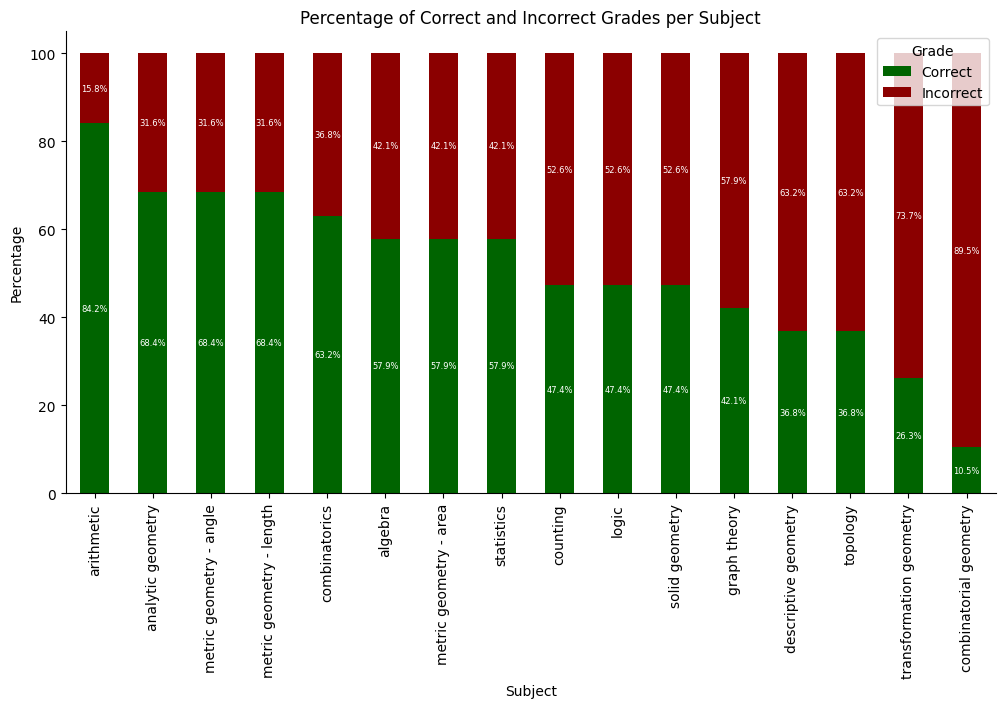

In [250]:
# Calculate the count of each grade per category
counts = df.groupby(['subject', 'Teacher Grade']).size().unstack(fill_value=0)

# Calculate the percentage of each grade per category
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Sort by the percentage of 'Correct' grades 
percentages = percentages.sort_values(by='Correct', ascending=False)

# Set the figure size 
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['darkgreen', 'darkred'], ax=ax)

# Add title and labels

plt.title('Percentage of Correct and Incorrect Grades per Subject')
plt.xlabel('Subject')
plt.ylabel('Percentage')

# Add legend
plt.legend(title='Grade')

# Add percentage labels on top of each bar 
for p in ax.patches: 
    width, height = p.get_width(), p.get_height() 
    x, y = p.get_xy() 
    percentage = f'{height:.1f}%' 
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center', fontsize=6, color='white')

# Remove top and right axes 
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()


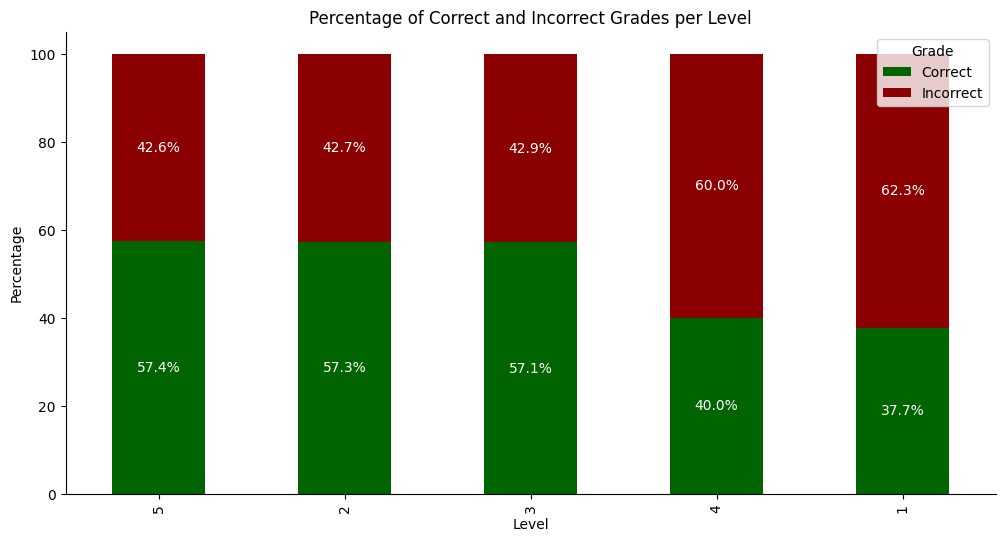

In [249]:
# Calculate the count of each grade per level
counts = df.groupby(['level', 'Teacher Grade']).size().unstack(fill_value=0)

# Calculate the percentage of each grade per level
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Sort by the percentage of 'Correct' grades 
percentages = percentages.sort_values(by='Correct', ascending=False)

# Set the figure size 
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['darkgreen', 'darkred'], ax=ax)

# Add title and labels
plt.title('Percentage of Correct and Incorrect Grades per Level')
plt.xlabel('Level')
plt.ylabel('Percentage')

# Add legend
plt.legend(title='Grade')

# Add percentage labels on top of each bar 
for p in ax.patches: 
    width, height = p.get_width(), p.get_height() 
    x, y = p.get_xy() 
    percentage = f'{height:.1f}%' 
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center', fontsize=10, color='white')

# Remove top and right axes 
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()